## Introduction

We have done wrangling the data (Please see more details [here](https://github.com/tvo10/spotify-recommendation-system/blob/main/02_spotify_recommendation_system_data_wrangling.ipynb)). In this notebook, we are going to explore the data in general. In other words, we will explore all the variables in the dataset.

All the work from this notebook are inspired by [What Makes Top Spotify Songs Popular?](https://www.kaggle.com/nadintamer/what-makes-top-spotify-songs-popular)

In [1]:
# import essential libraries
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in songs.csv
df = pd.read_csv('data/songs.csv')
print(df.shape)
df.head()

(6350, 17)


name        artists  popularity  danceability  energy  key  \
0             晴天       Jay Chou          61         0.547   0.567  7.0   
1              零       Alan Kuo          42         0.494   0.565  3.0   
2  寶貝 (In a Day)  Deserts Chang          44         0.827   0.160  0.0   
3             雨愛    Rainie Yang          55         0.422   0.657  4.0   
4             掉了    A-Mei Chang           0         0.547   0.475  1.0   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -7.295   1.0       0.0242         0.276          0.000548    0.1040   
1    -4.958   0.0       0.0291         0.061          0.000000    0.1210   
2   -12.729   1.0       0.0483         0.887          0.000000    0.1050   
3    -5.274   1.0       0.0292         0.214          0.000000    0.1290   
4    -6.613   1.0       0.0278         0.811          0.000000    0.0722   

   valence    tempo  duration_ms    year  language  
0   0.3990  137.130     269747.0  2003.0  Mandarin  
1   0.0989  120.026     279893.0  2005.0  Mandarin  
2   0.3880  119.891     145440.0  2006.0  Mandarin  
3   0.2180  159.957     261560.0  2009.0  Mandarin  
4   0.1420  161.965     239560.0  2009.0  Mandarin

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6350 non-null   object 
 1   artists           6350 non-null   object 
 2   popularity        6350 non-null   int64  
 3   danceability      6350 non-null   float64
 4   energy            6350 non-null   float64
 5   key               6350 non-null   float64
 6   loudness          6350 non-null   float64
 7   mode              6350 non-null   float64
 8   speechiness       6350 non-null   float64
 9   acousticness      6350 non-null   float64
 10  instrumentalness  6350 non-null   float64
 11  liveness          6350 non-null   float64
 12  valence           6350 non-null   float64
 13  tempo             6350 non-null   float64
 14  duration_ms       6350 non-null   float64
 15  year              6308 non-null   float64
 16  language          6350 non-null   object 


## Exploratory Data Analysis

In [4]:
# set up size and color for sns
sns.set(rc={'figure.figsize':(15,4)})
plt.rcParams['figure.dpi'] = 300
plt.style.use('fivethirtyeight')

### Songs

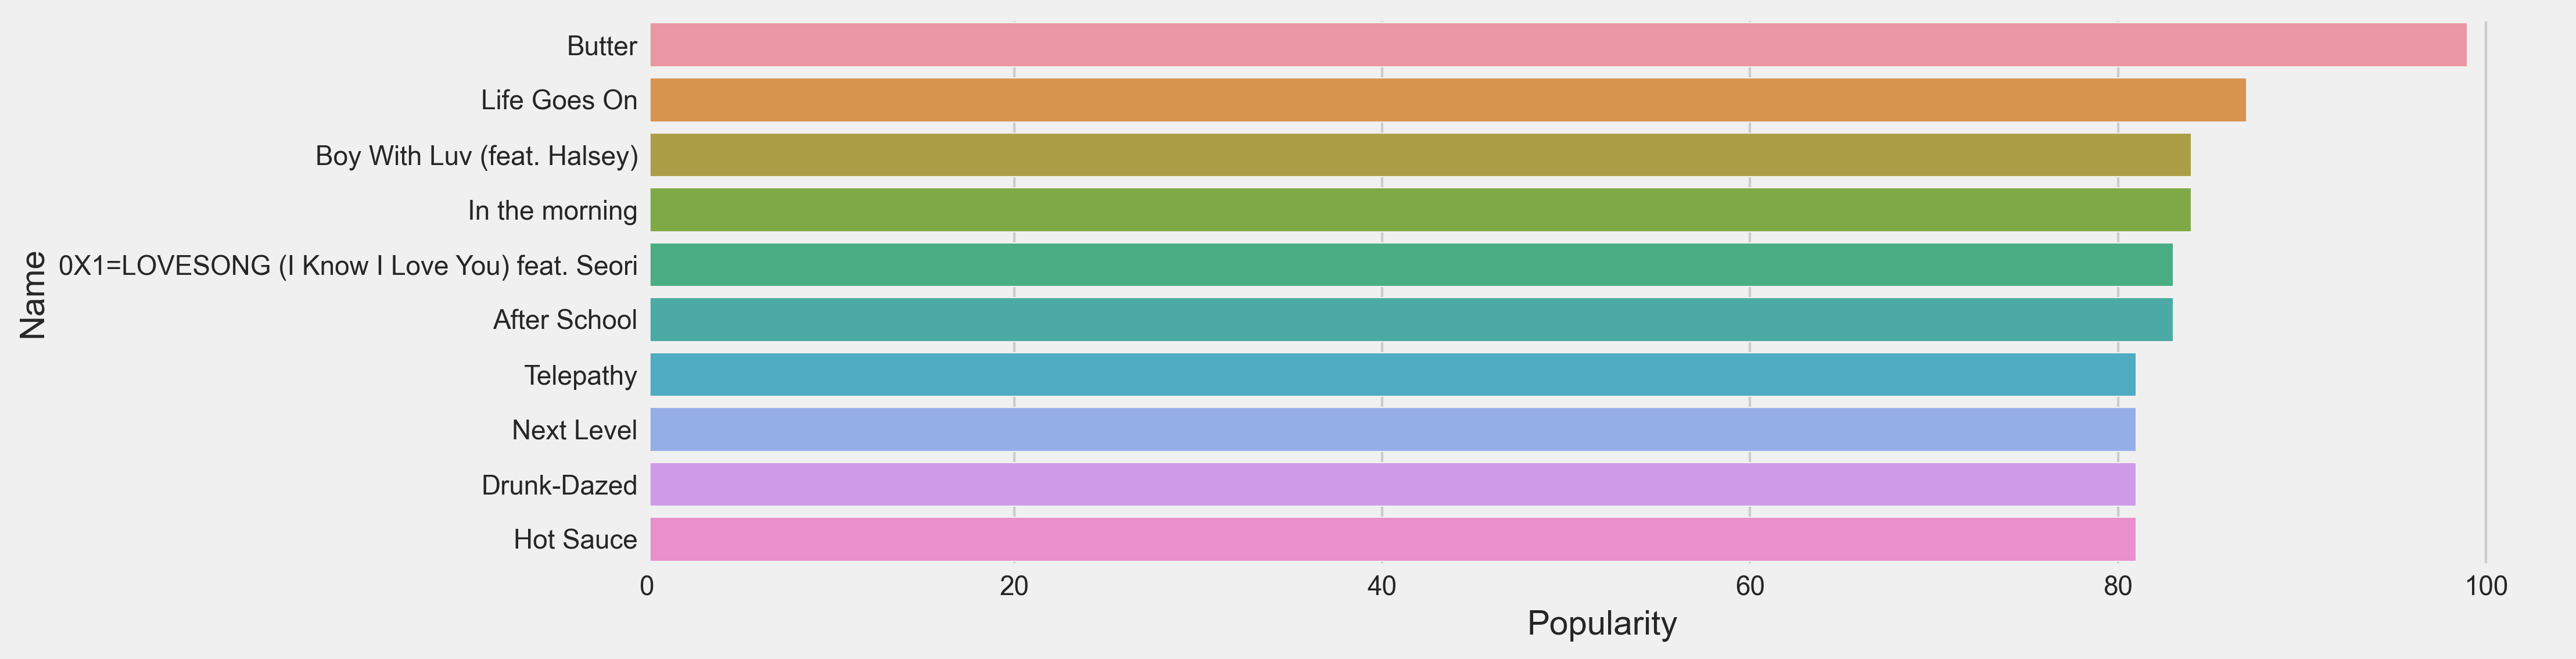

In [5]:
# top 10 popular songs in the dataset
songs = df.groupby('name')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=songs, y=songs.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Name', fontsize=14)
plt.tight_layout()

Interesting! It appears that Korean songs are very very popular in the dataset. There is not a single Mandarin song or Vietnamese song shows up in the chart.

### Artist(s)

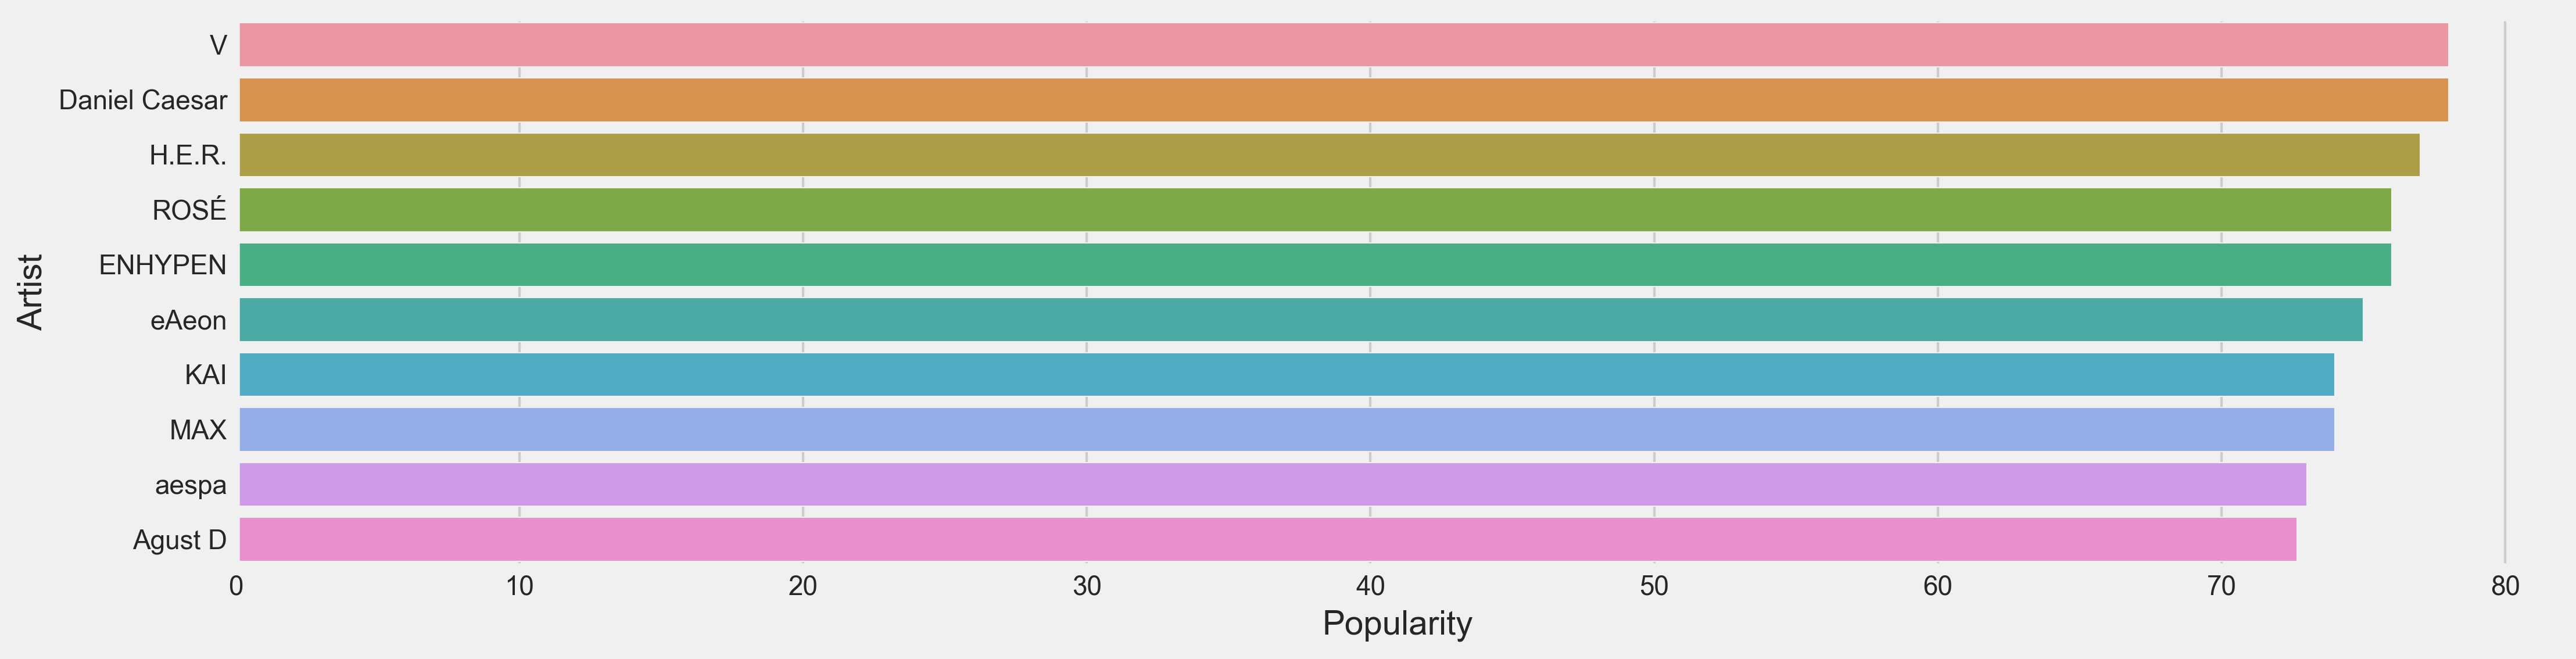

In [6]:
# top 10 popular songs in the dataset
artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=artists, y=artists.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.tight_layout()

Hmm, based on my music knowledge, Daniel Ceasar and H.E.R have not published songs in Mandarin/Korean/Vietnamese or collaborated with other Asian artists. We can anticipate that this can happen since we scraped the data from various playlists of several users on Spotify. Some users might add songs that are not in Mandarin/Korean/Vietnamese into a playlist named "Kpop/Mandopop/Vpop" that they created . Therefore, we will remove these two artists from the dataframe and visualize it again.

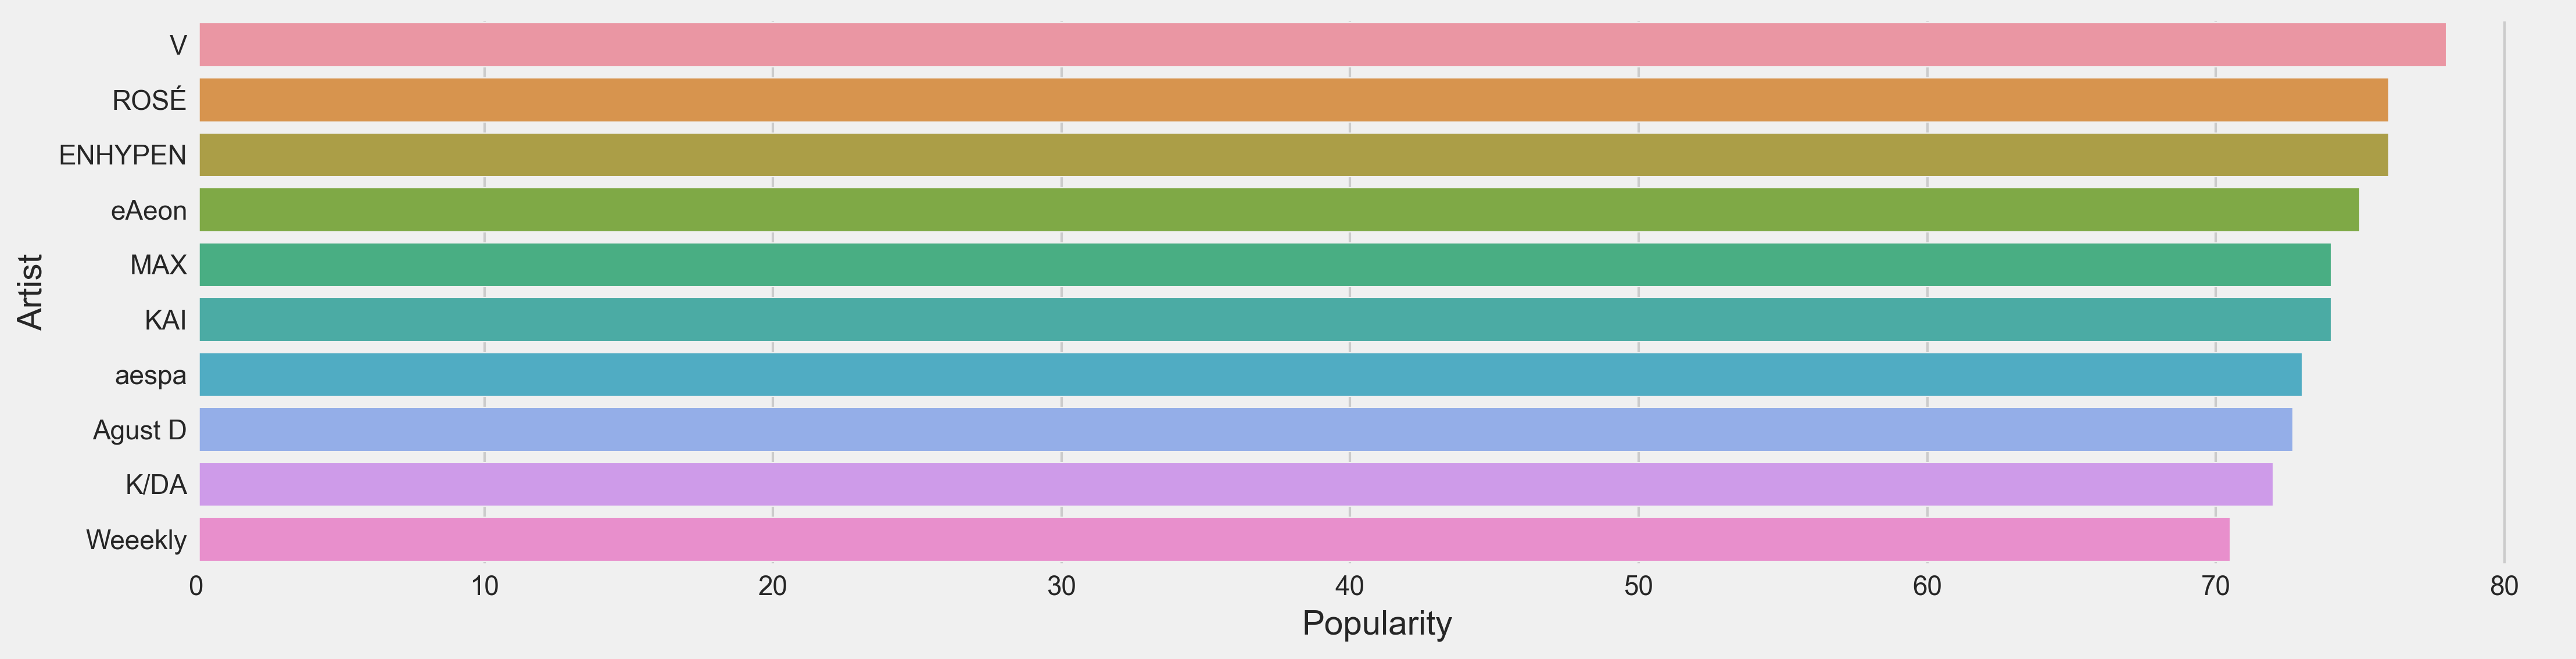

In [7]:
artists = df[(df['artists'] != 'Daniel Caesar') & (df['artists'] != 'H.E.R.')]
artists = artists.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=artists, y=artists.index, orient = 'h')
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.tight_layout()

Perfect! All the artists now are the ones that have published songs in Korean.

### Audio Characteristics 

Firstly, to have a general sense of the features, we discover the audio characteristics over the years. We only choose features with float values that are within the range from 0 to 1 as they make our plot easy to interpret!

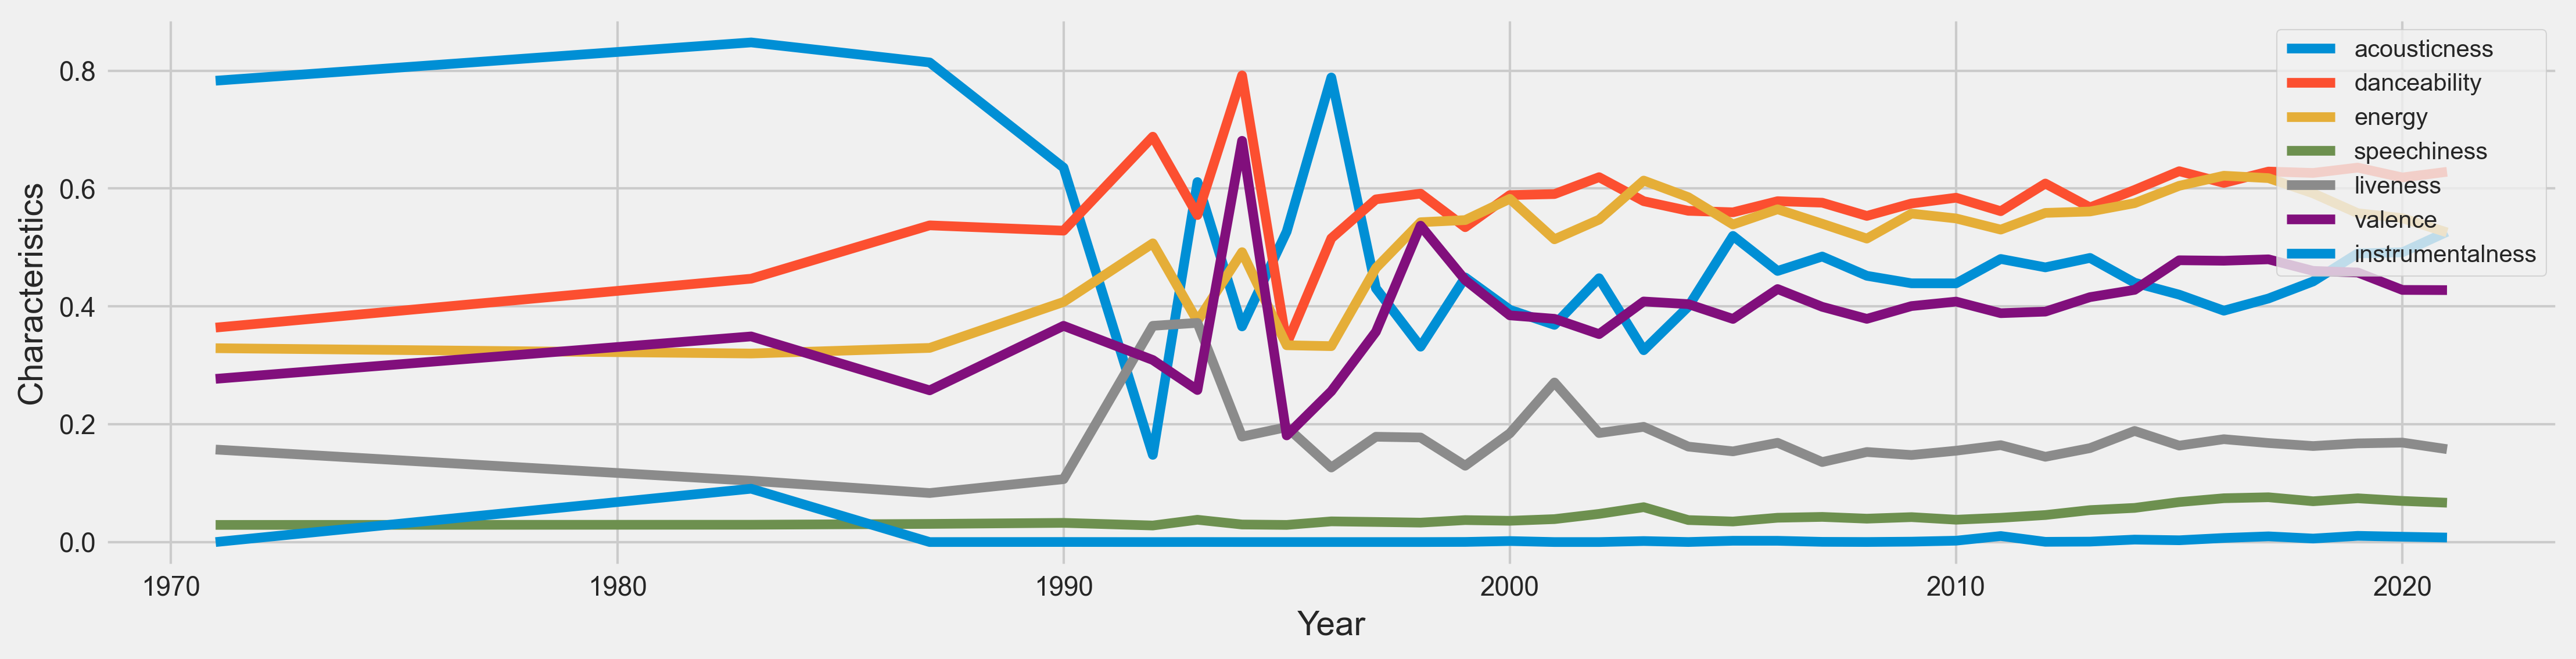

In [8]:
# Audio characteristics over the years
columns = ['acousticness', 'danceability', 'energy', 'speechiness', 'liveness', 'valence', 'instrumentalness']
for i in columns:
    x = df.groupby('year')[i].mean()
    sns.lineplot(x=x.index, y=x, label=i)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Characteristics', fontsize=14)
plt.legend(prop={'size': 10}, loc = 'upper right')
plt.tight_layout()

As shown in the plot, the audio characteristics of the songs have been changed over the years. For instance, acousticness had a very high value from 1970s to 1980s as its peak was more than 0.8 in 1980s. However, the value droped to below 0.2 in 1990s then changed over the times. In 2020s, the value goes up to 0.5. We can assume that most of the songs in the past were ascoustic songs; however, the acoustic songs are not the trend in 2020s.

Similarly, danceability started from less than 0.4 in 1970s but then it transformed over the years. Recently, its value goes up to more than 0.6 a little bit. Therefore, we can make an assumption that in the past, most of the songs were not really danceable. However, from 2000s until now, most of the songs are written or produced to be danceable.    

### Danceability

*Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.*

Mean value of danceability: 0.615237795275591


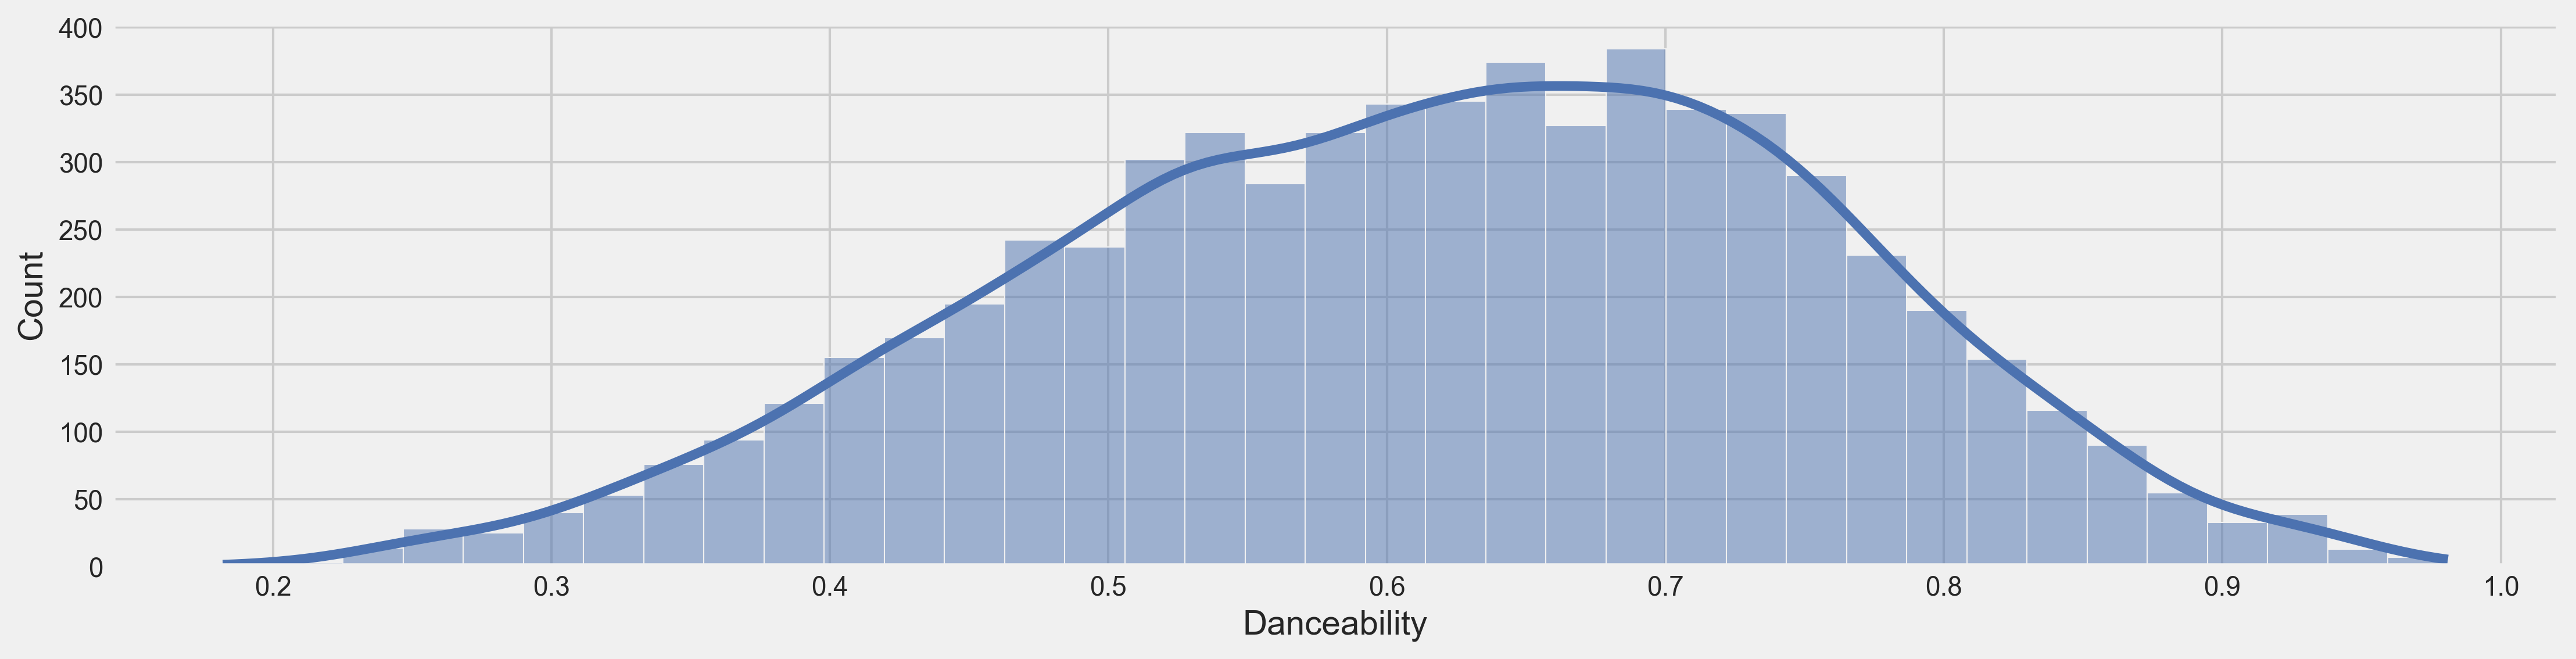

In [9]:
# mean value and histplot for danceability feature
print("Mean value of danceability:", df['danceability'].mean())
sns.histplot(x='danceability', data=df, kde=True)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 0.62, it seems like the majority of the tracks are danceable.

### Energy

*Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.*

Mean value of energy: 0.5680463464566936


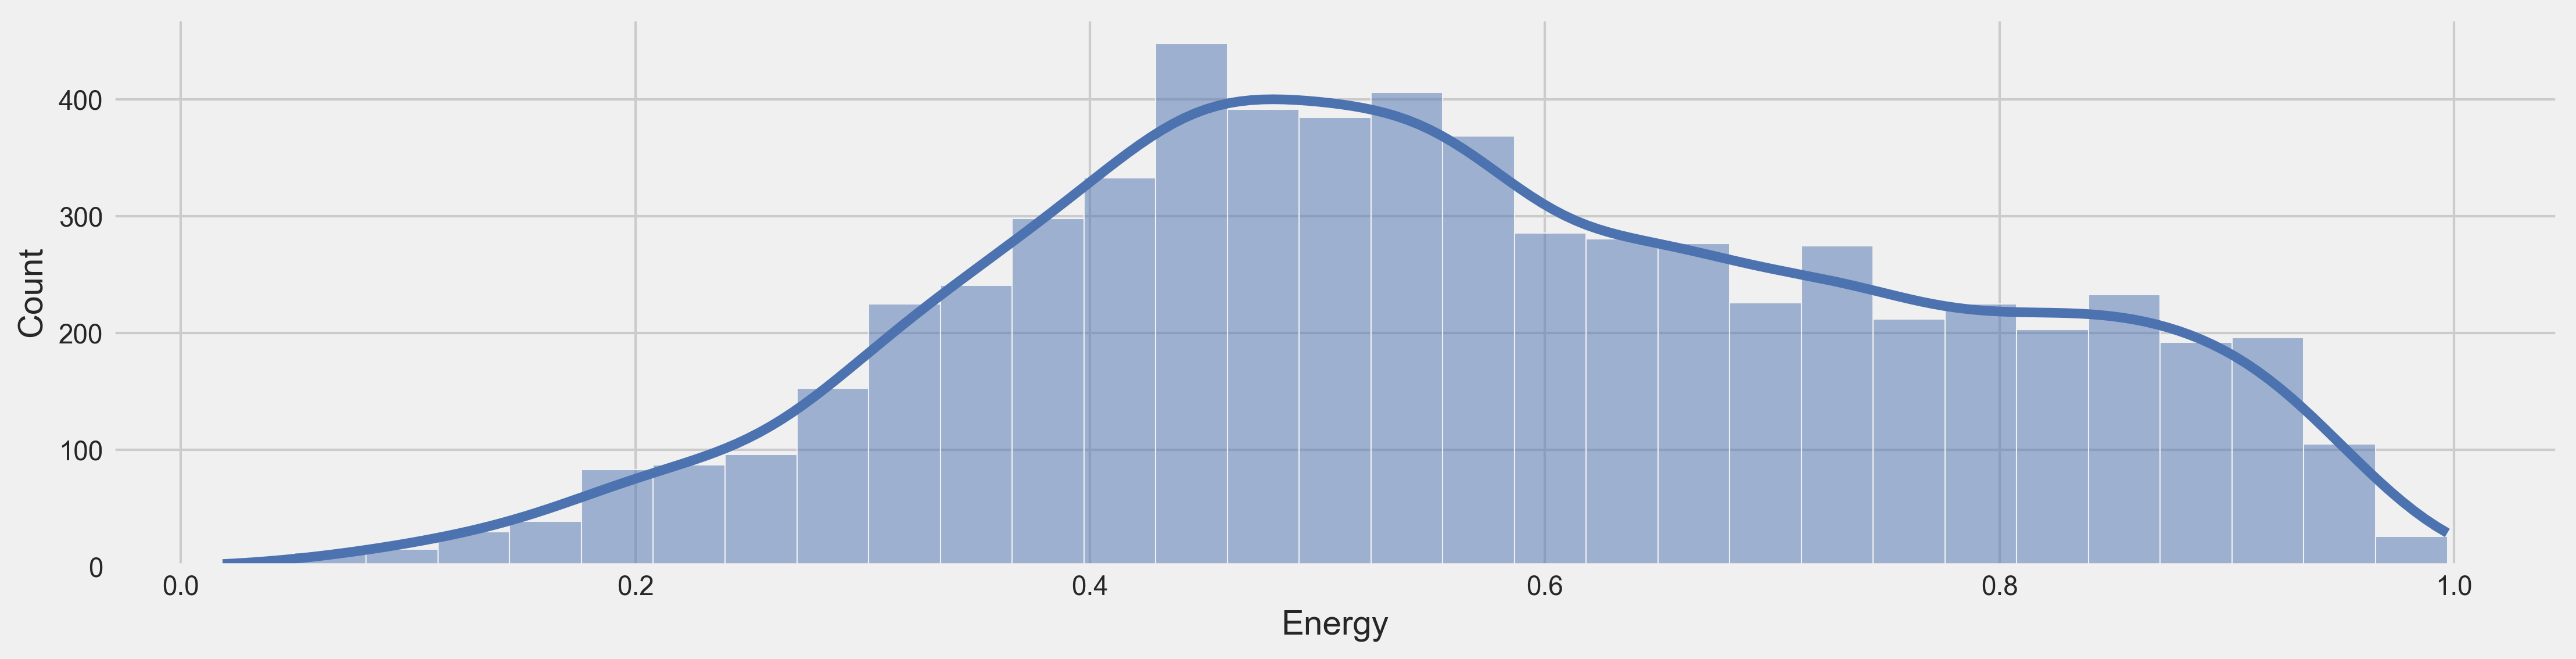

In [10]:
# mean value and histplot for for energy feature
print("Mean value of energy:", df['energy'].mean())
sns.histplot(x='energy', data=df, kde=True)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

Similar to danceability feature, with an average of 0.57, it seems like the majority of the tracks feel fast, loud, and noisy.

### Key

*Key is the major or minor scale around which a piece of music revolves.*

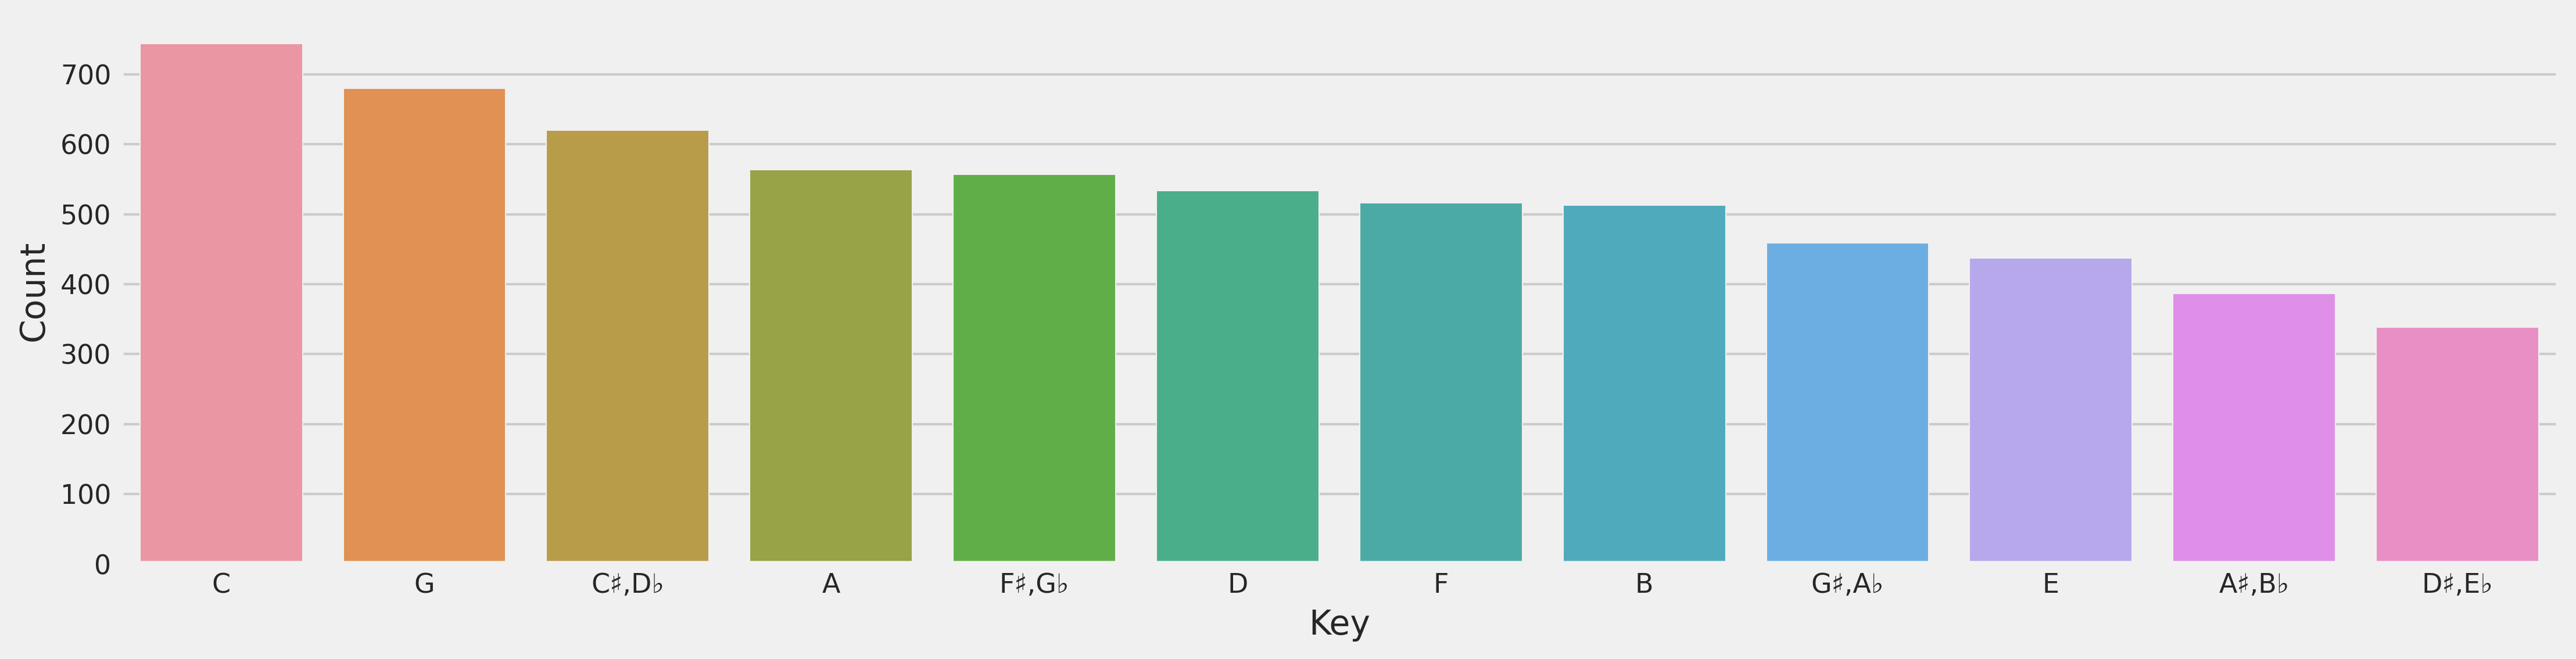

In [11]:
#map the numeric values of key to notes
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
df['key'] = df['key'].map(key_mapping)

sns.set_style({'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans']})
sns.countplot(x ='key', data=df, order=df['key'].value_counts().index)
plt.xlabel('Key', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

As shown above, the most common key among the tracks is C.

### Loudness

*The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.*

Mean value of loudness: -6.904143149606278


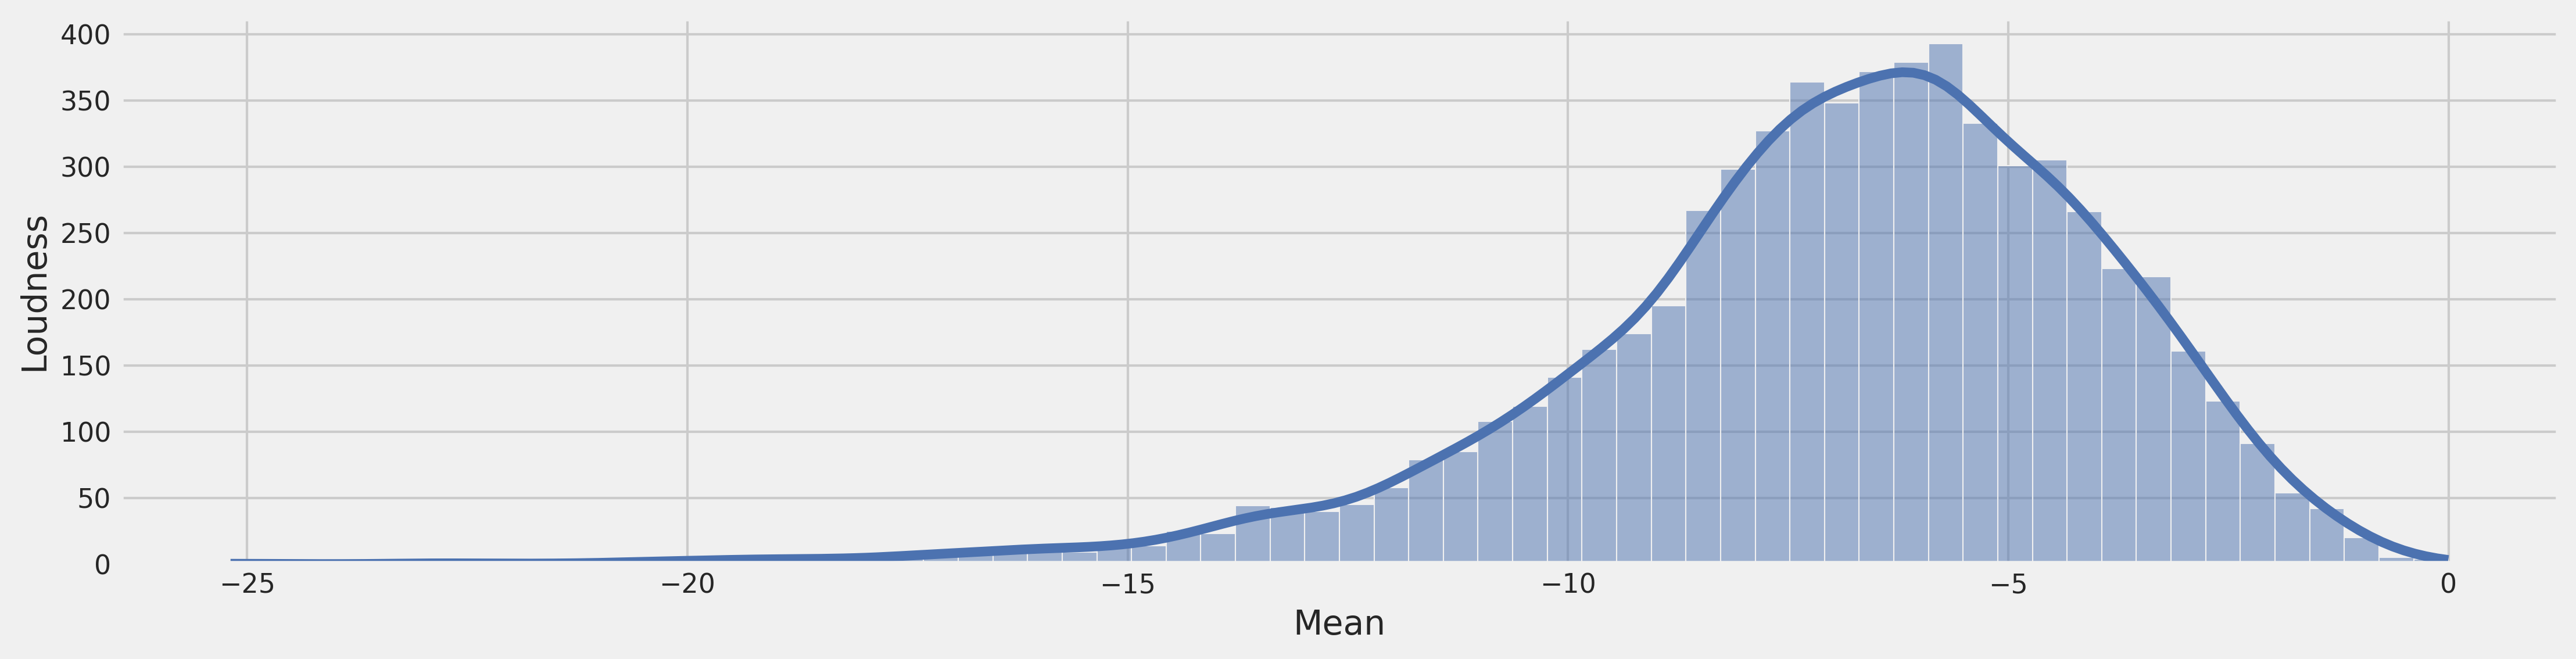

In [12]:
# mean value and histplot for loudness feature
print("Mean value of loudness:", df['loudness'].mean())
sns.histplot(x='loudness', data=df, kde=True)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Loudness', fontsize=14)
plt.tight_layout()

All tracks' average of loudness values is -7 db.

### Mode

*Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.*

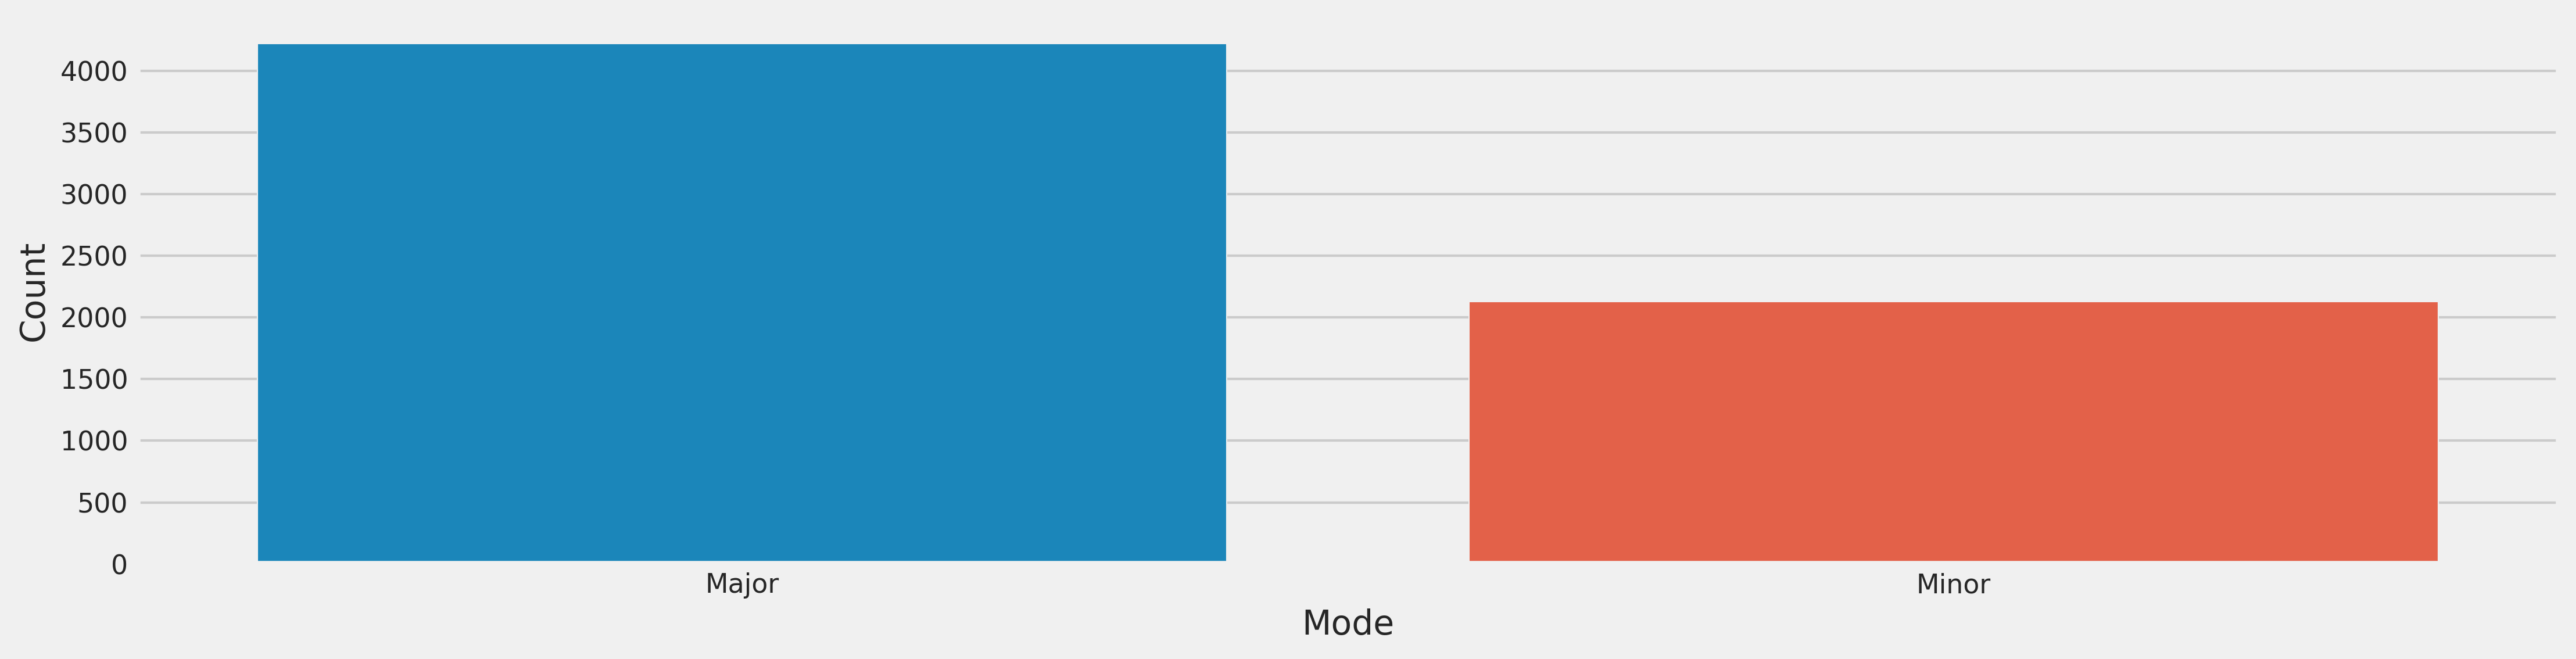

In [13]:
#map the binary value of mode to major/minor
mode_mapping = {1.0: "Major", 0.0: "Minor"}
df['mode'] = df['mode'].map(mode_mapping)

#draw a countplot of the values
sns.countplot(x ='mode', data=df)
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

More than 4000 songs are major; on the other hand, more than 2000 songs are minor.

### Speechiness

*Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.*

Mean value of speechiness: 0.065691464566929


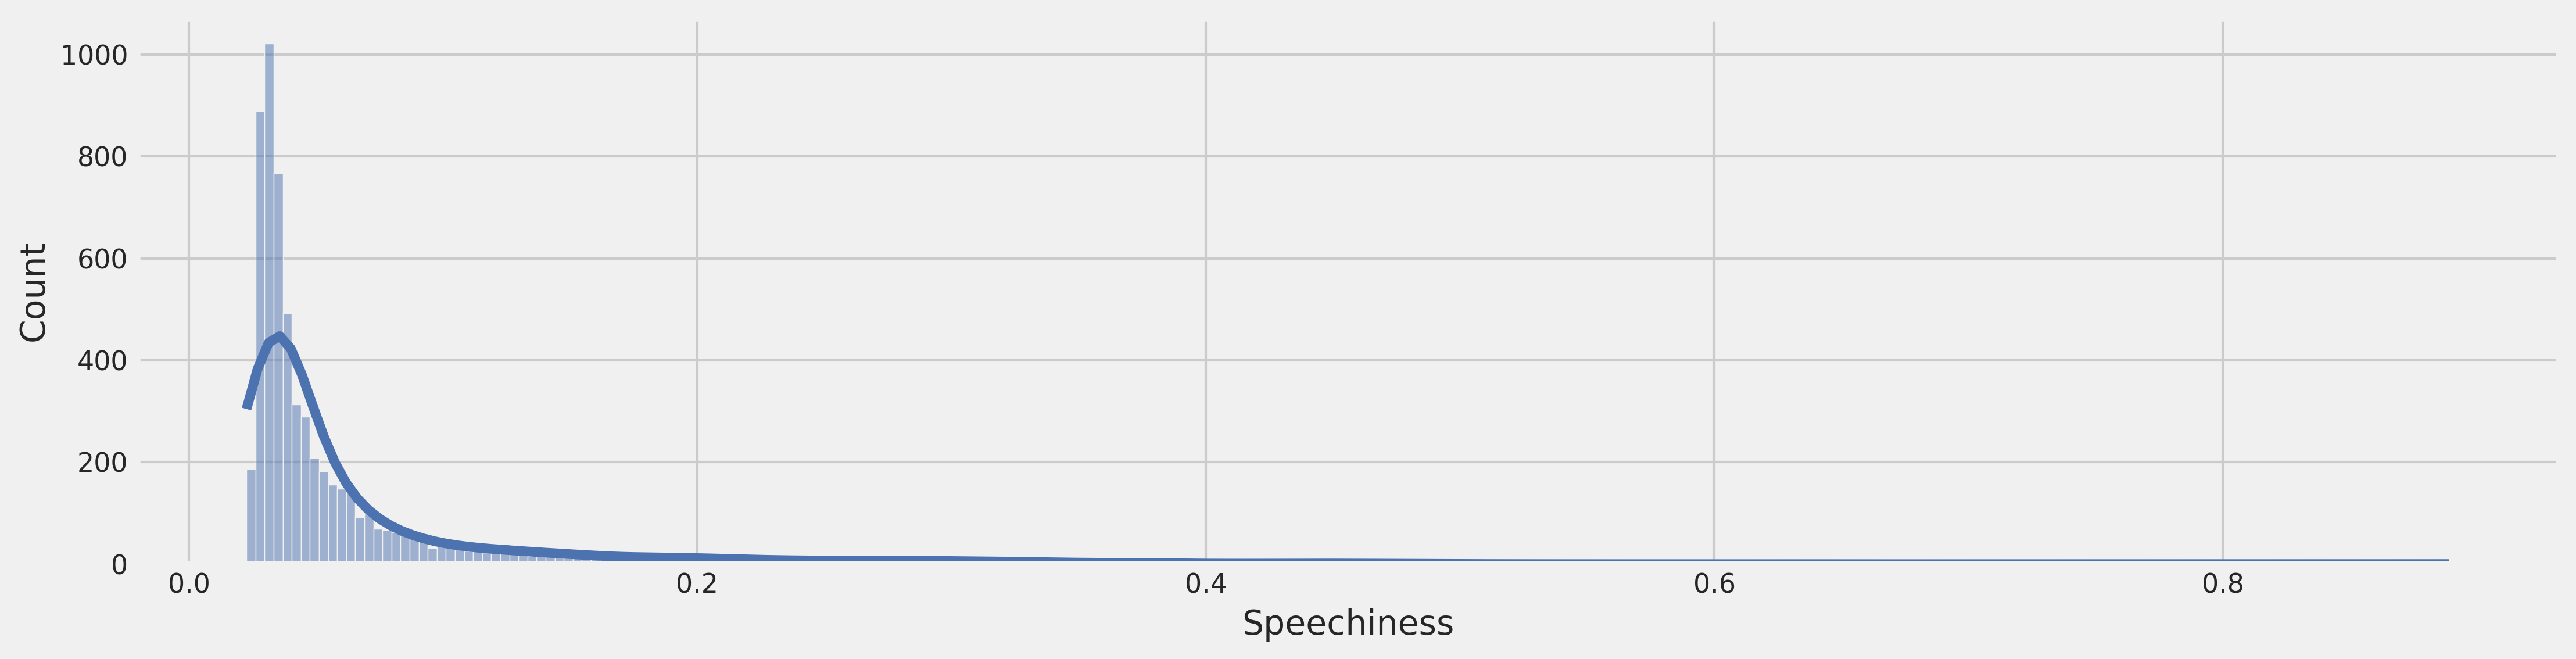

In [14]:
# mean value and histplot for speechiness feature
print("Mean value of speechiness:", df['speechiness'].mean())
sns.histplot(x='speechiness', data=df, kde=True)
plt.xlabel('Speechiness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 0.07, we can conclude that all songs do not sound like an audio book, a poetry, or a talk show.

### Acousticness

*A measure from 0.0 to 1.0 of whether the track is acoustic.*

Mean value of acousticness: 0.4642323228346466


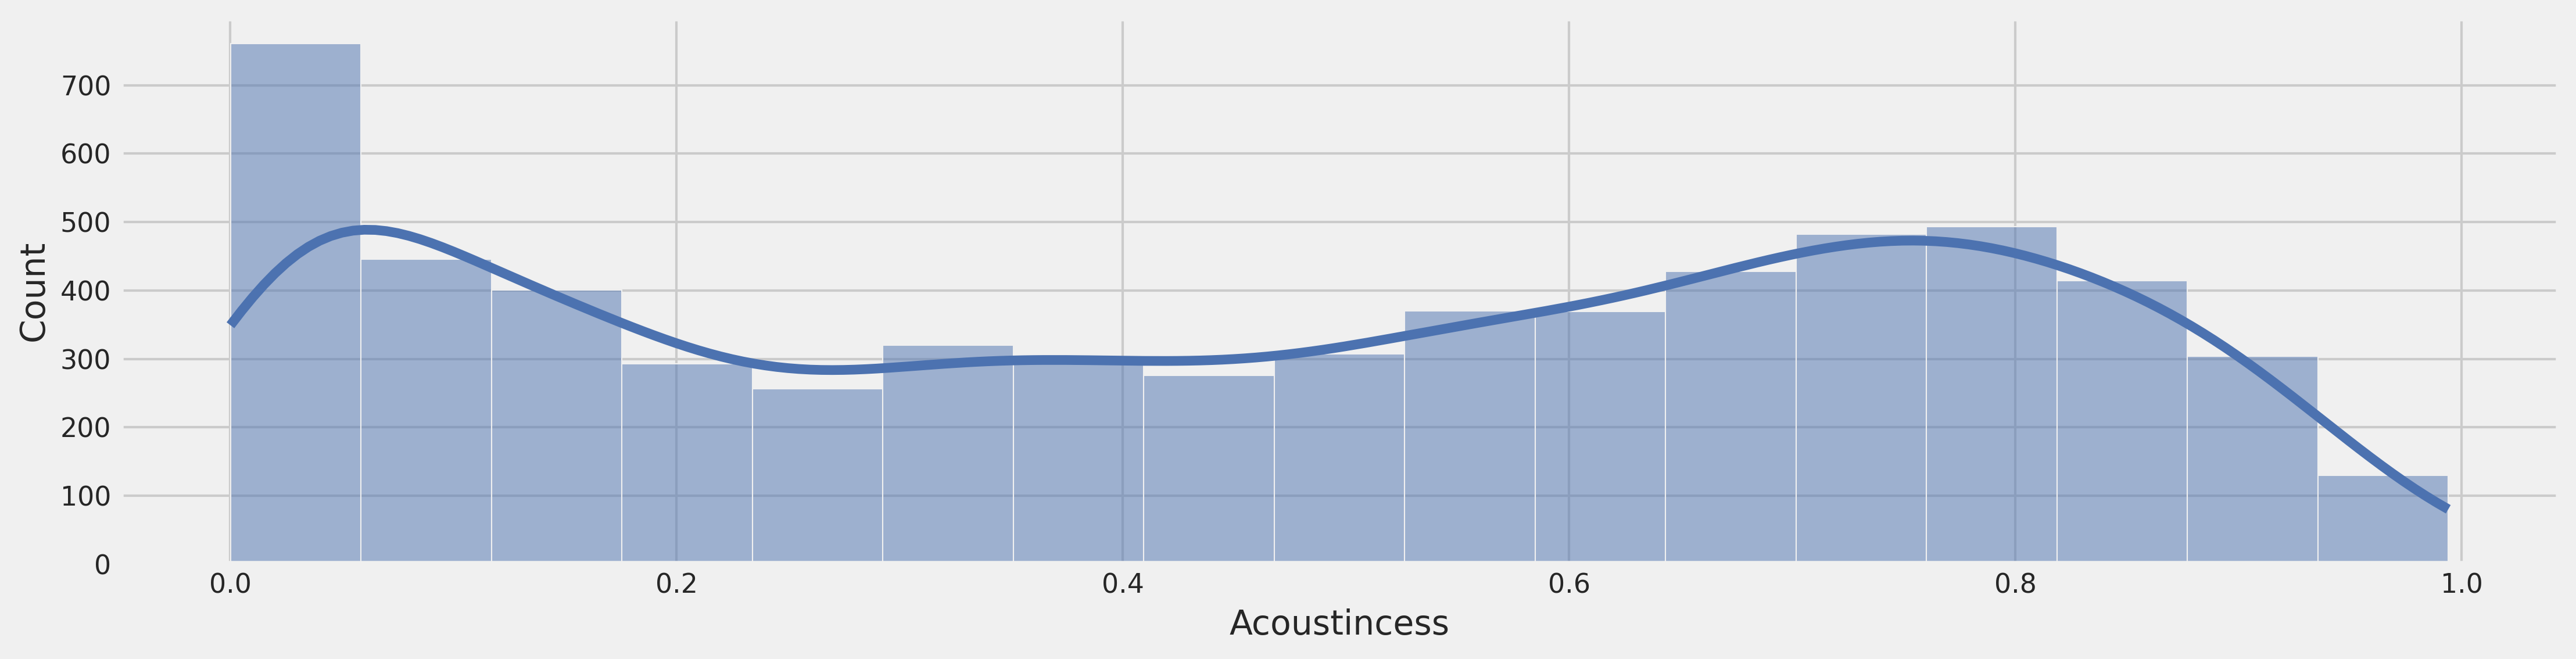

In [15]:
# mean value and histplot for acousticness feature
print("Mean value of acousticness:", df['acousticness'].mean())
sns.histplot(x='acousticness', data=df, kde=True)
plt.xlabel('Acoustincess', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 0.46, Spotify streamers seem to stream acoustic songs!

### Instrumentalness

*Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.*

Mean value of instrumentalness: 0.006993683510236219


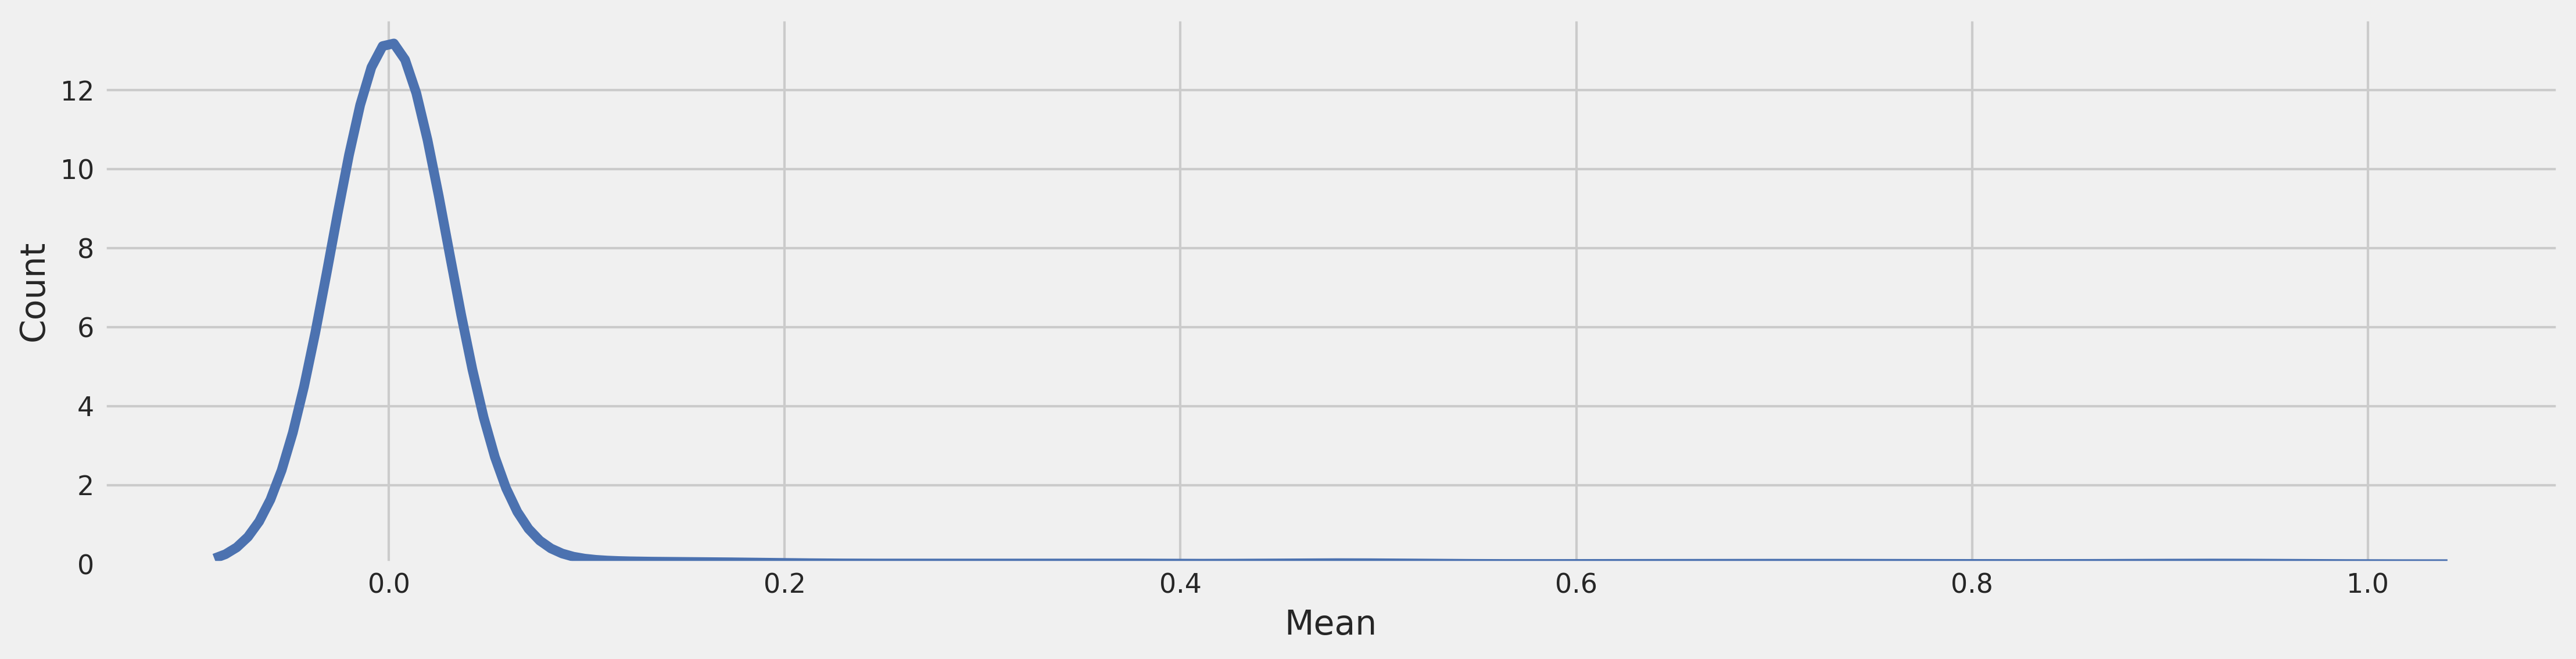

In [16]:
# mean value and histplot for instrumentalness feature
print("Mean value of instrumentalness:", df['instrumentalness'].mean())
sns.kdeplot(np.array(df['instrumentalness']), color='b', bw_method=0.5, label='keyword')
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 0.007, very few tracks contain no vocals. In other words, the majority of the songs contain vocal contents.

### Liveness

*Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.*

Mean value of liveness: 0.16550096062992148


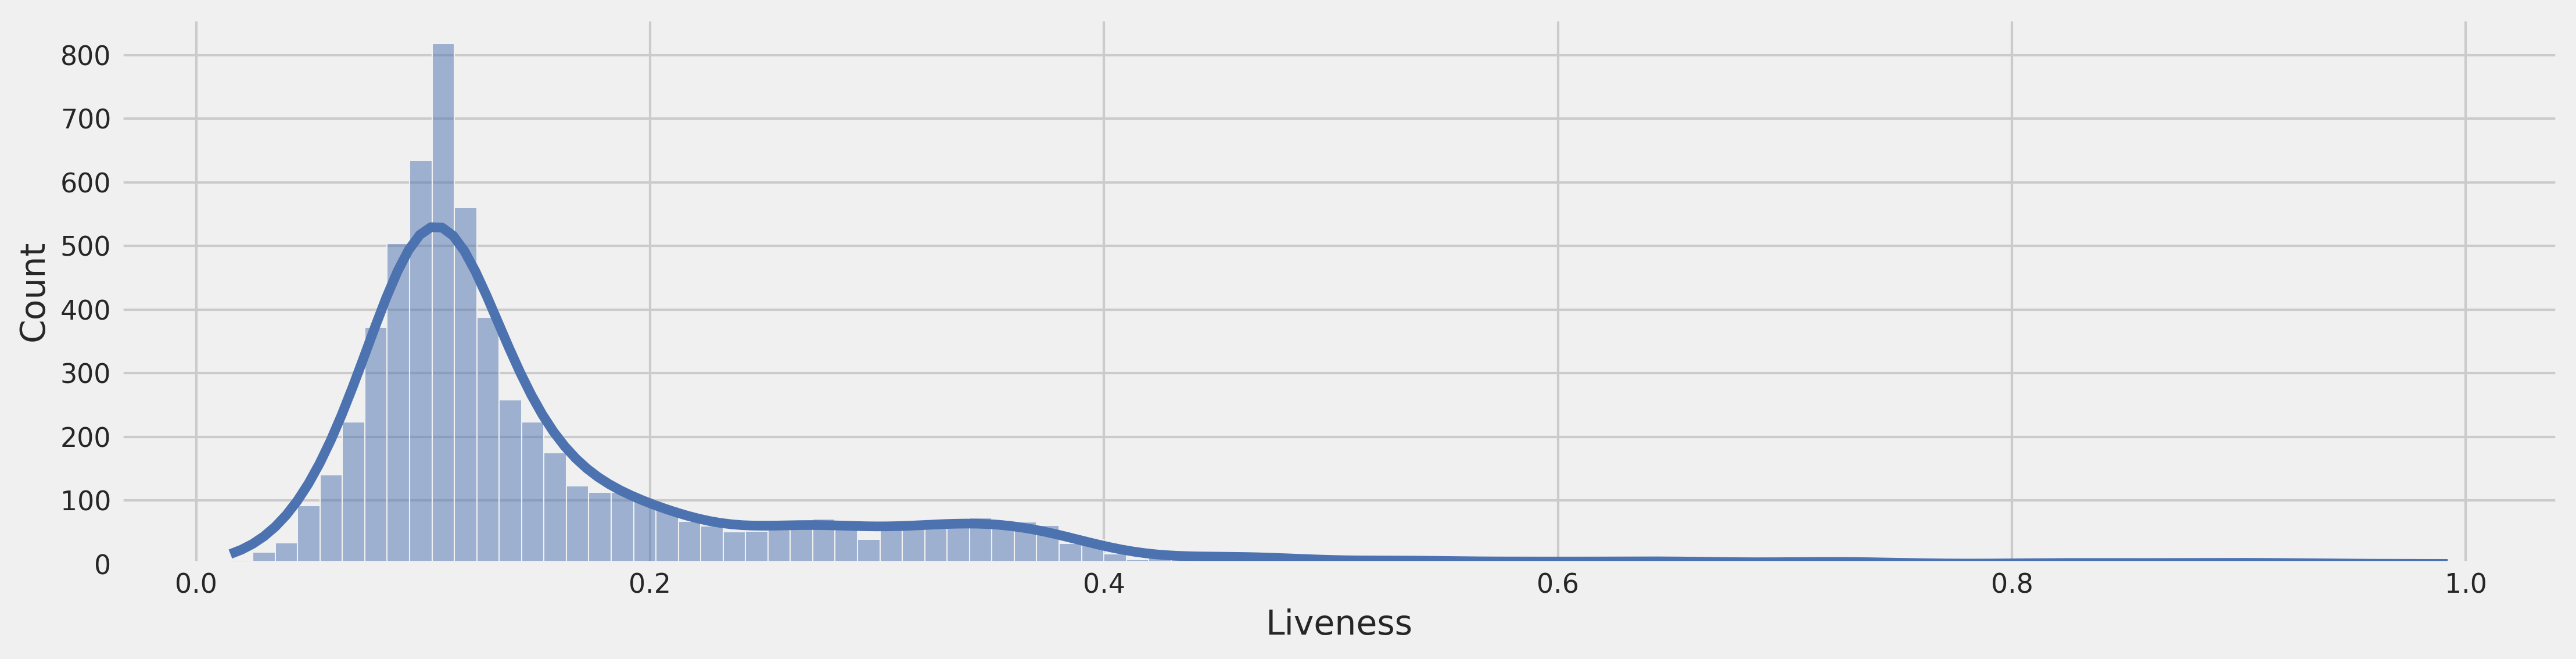

In [17]:
# mean value and histplot for valence feature
print('Mean value of liveness:', df['liveness'].mean())
sns.histplot(x='liveness', data=df, kde=True)
plt.xlabel('Liveness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 0.17, only a few songs are performed live. 

### Valence

*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*

Mean value of valence: 0.44135955905511937


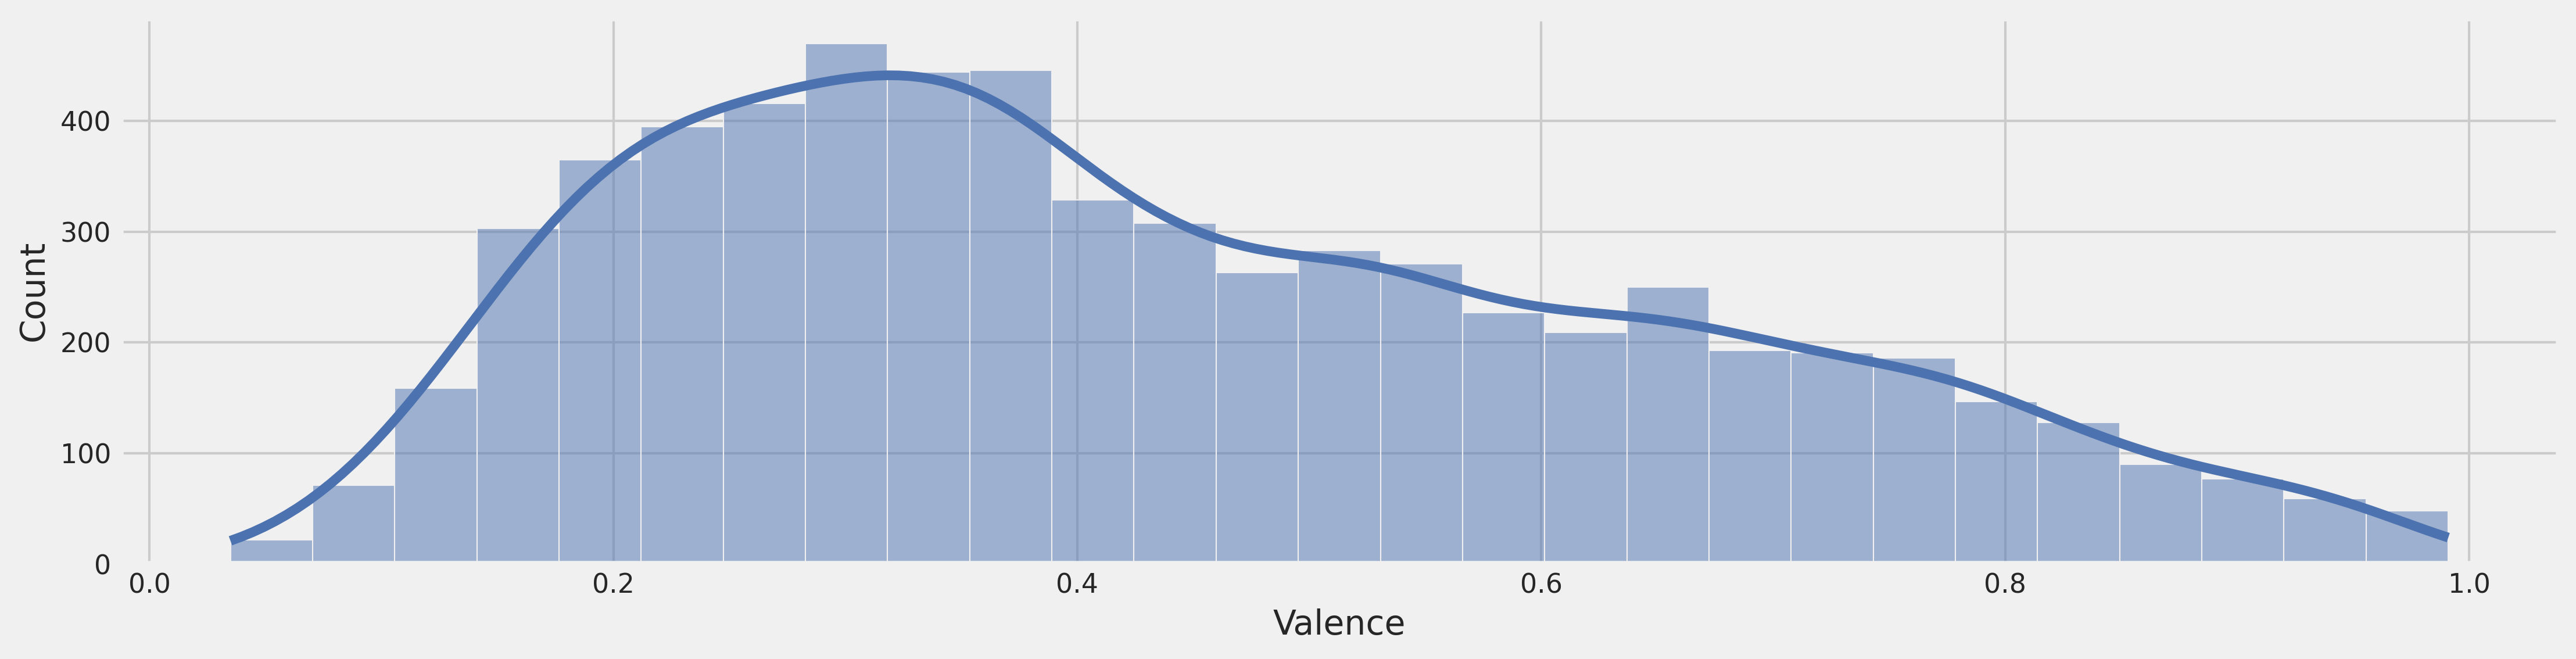

In [18]:
# mean value and histplot for valence feature
print('Mean value of valence:', df['valence'].mean())
sns.histplot(x='valence', data=df, kde=True)
plt.xlabel('Valence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 0.44, perhaps most of the songs are sad. 

### Tempo

*The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.*

Mean value of tempo: 122.12695637795257


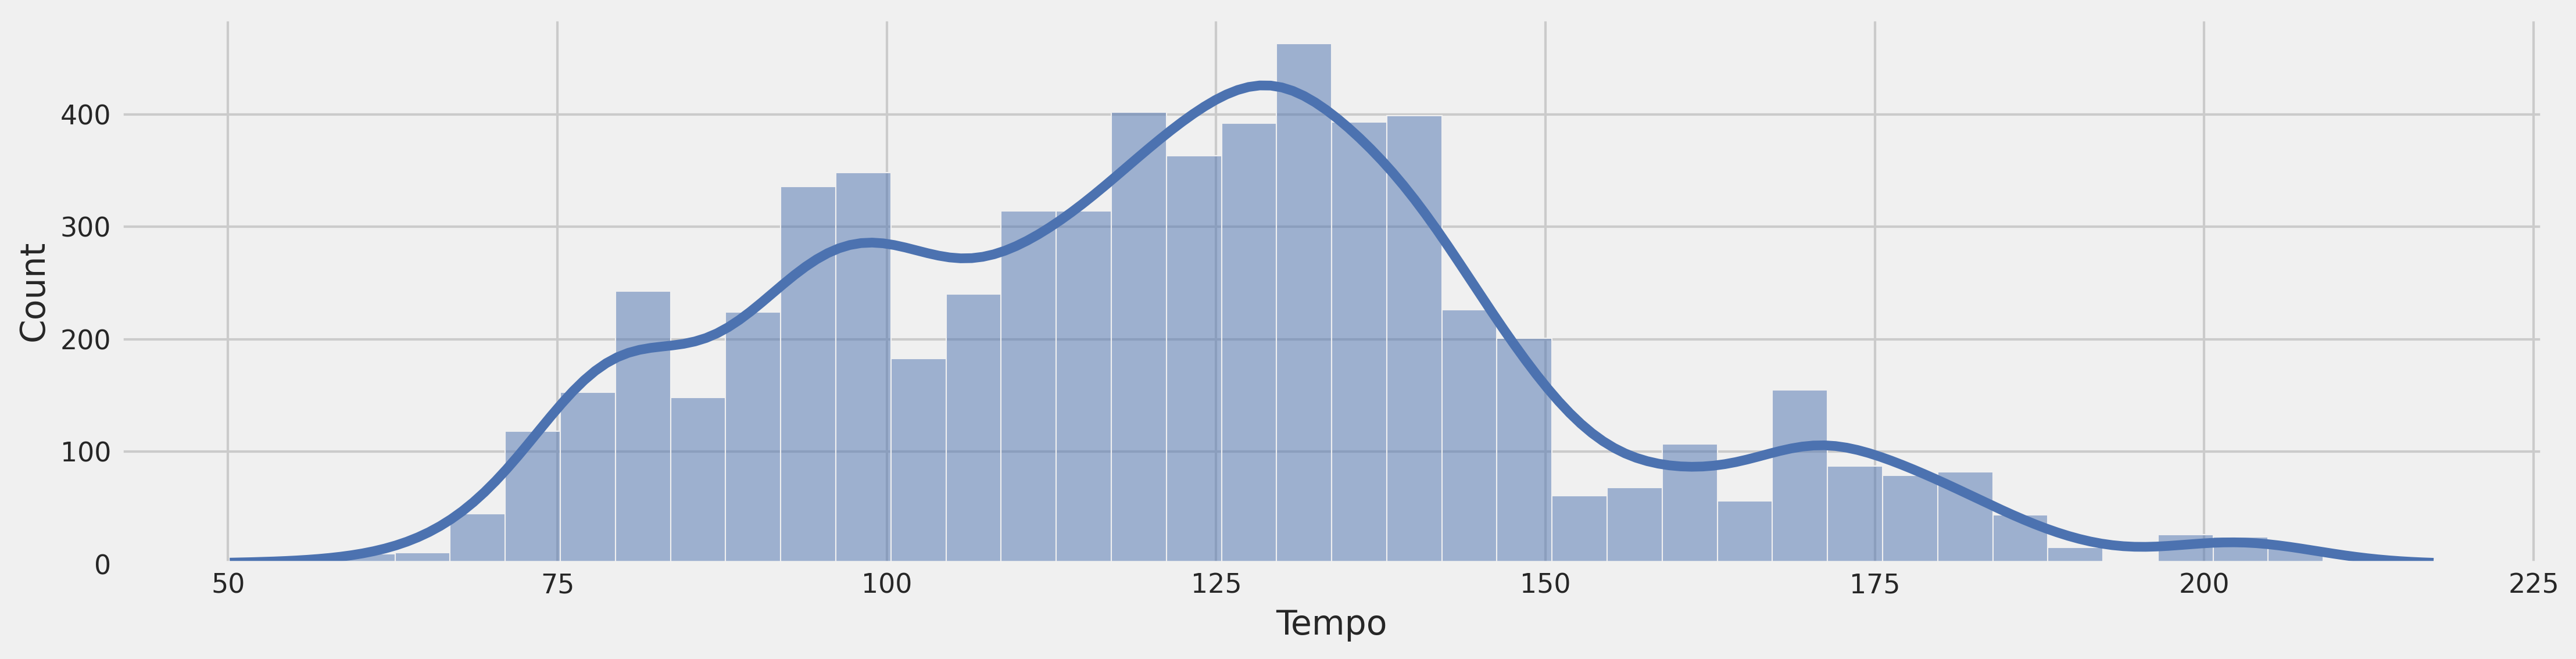

In [19]:
# mean value and histplot for tempo feature
print('Mean value of tempo:', df['tempo'].mean())
sns.histplot(x='tempo', data=df, kde=True)
plt.xlabel('Tempo', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 122.17, we can tell that most tracks are in normal speed rate. We can see a few songs even have more than 200 BPM; therefore, a few songs perhaps are rap songs?

### Duration (ms)
*Duration of the song in millisecond.*

Mean value of duration_ms: 234992.78188976378


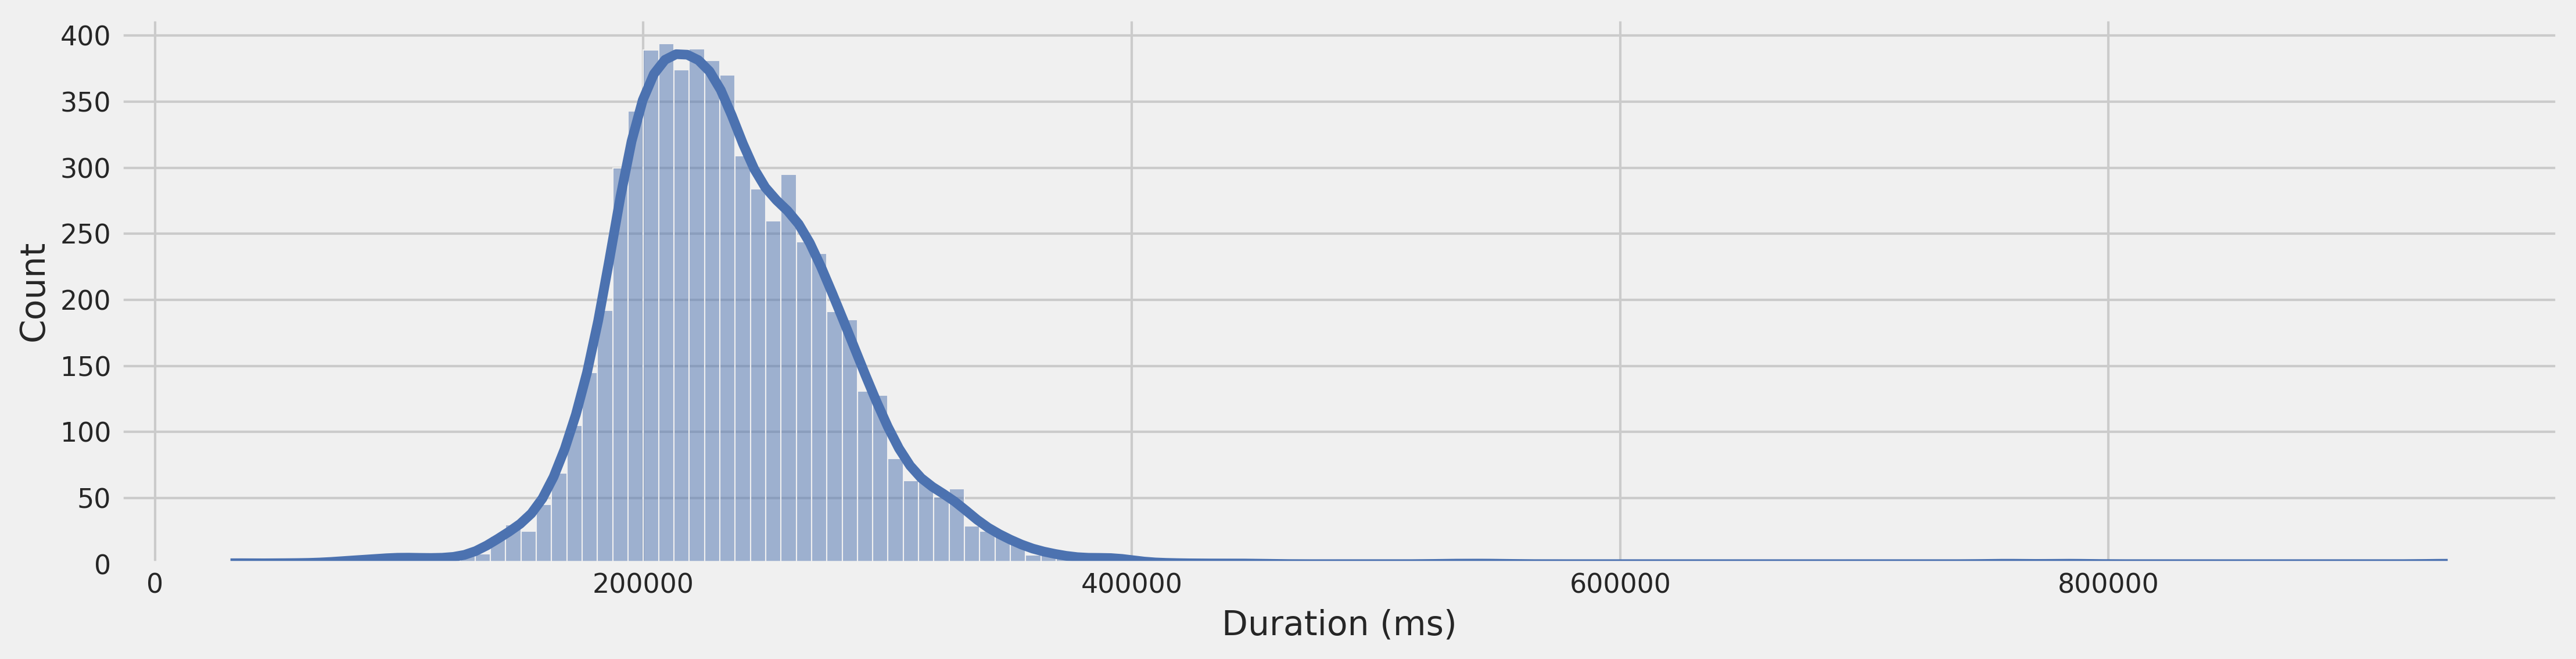

In [20]:
# mean value and histplot for duration_ms feature
print('Mean value of duration_ms:', df['duration_ms'].mean())
sns.histplot(x='duration_ms', data=df, kde=True)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()

With an average of 234993, which can be interpreted as ~4 minutes, we can assume that most tracks are 4 minutes.

### Correlation

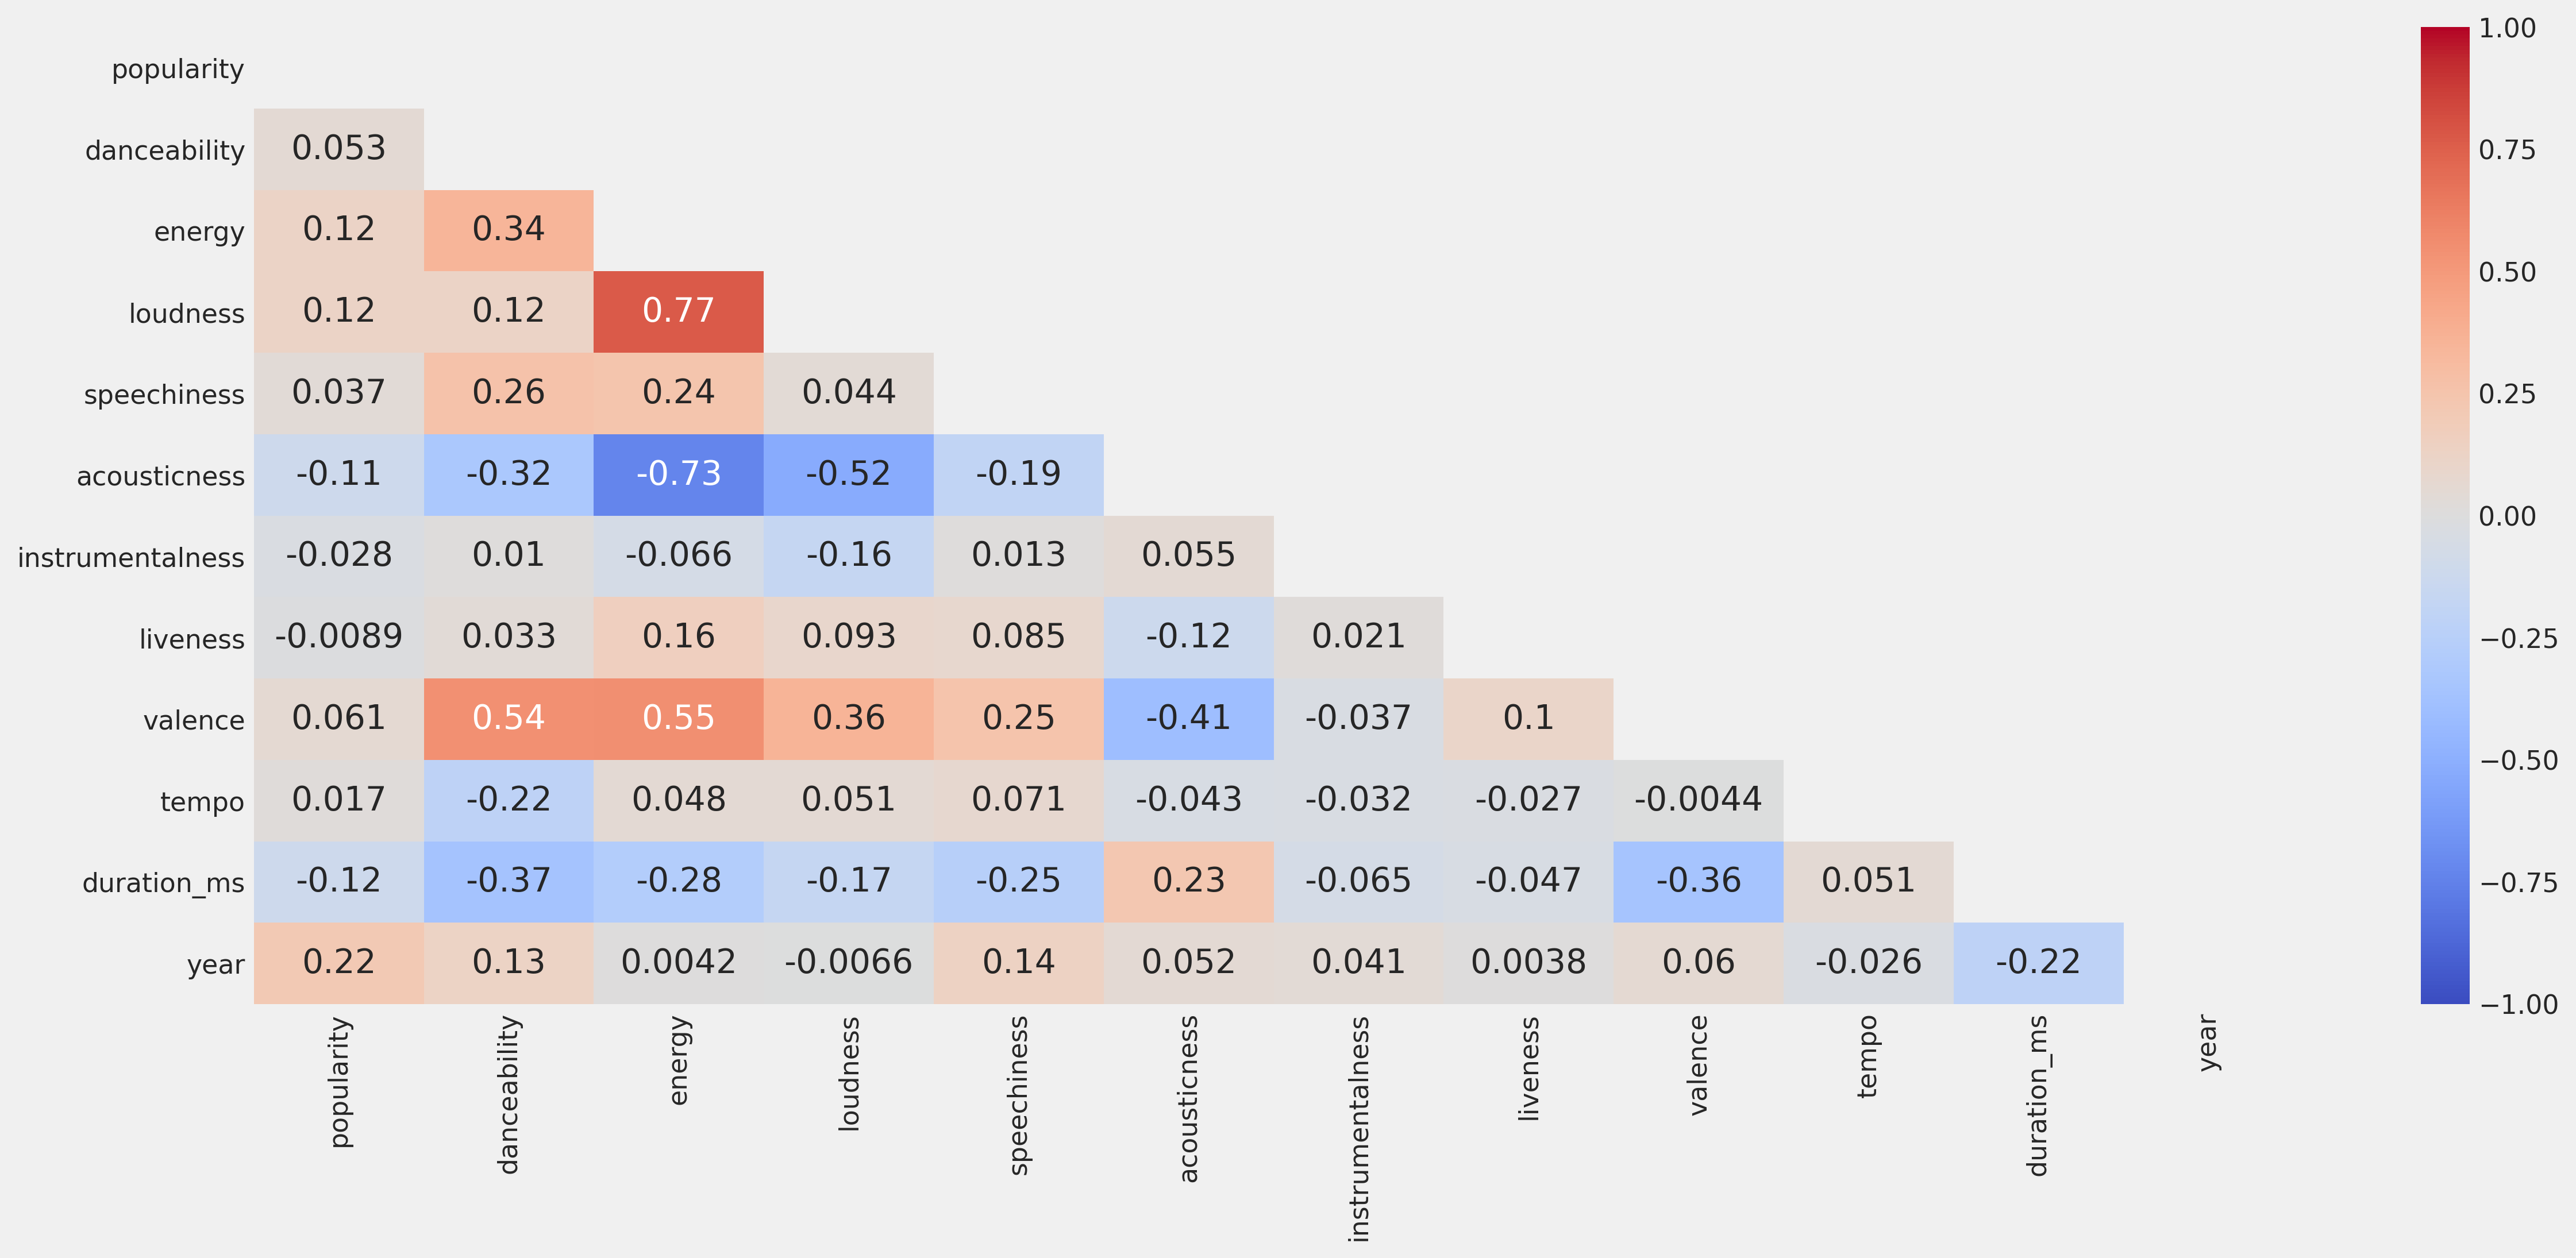

In [21]:
# triangle correlation heatmap
plt.figure(figsize=(17, 7))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

Hmm, let's only focus on the values with the correlation coefficient larger than 0.5. We can clearly notice that loudness and energy have the correlation coefficient of 0.77. Similarly, the correlation coefficient between valence and danceability is 0.54, while the correlation coefficient between valence and energy is 0.55.

These total make sense as the louder the song, the more energy it transfers to the music players. Furthermore, whether the song is danceable or can transfer positive energy to the players, it depends on the valence (the mood of the song). If a song is a happy song, then it is obviously danceable as it feasibly transfers positive energy to the players. However, if it is a sad song, then it is not danceable since it transfers negative energy to the players. 

Let's generate three plots with fitting a linear regression model, one shows the relationship between loudness and energy, the other shows the relationship between valence and danceability, and the last one shows the relationship between valence and energy.

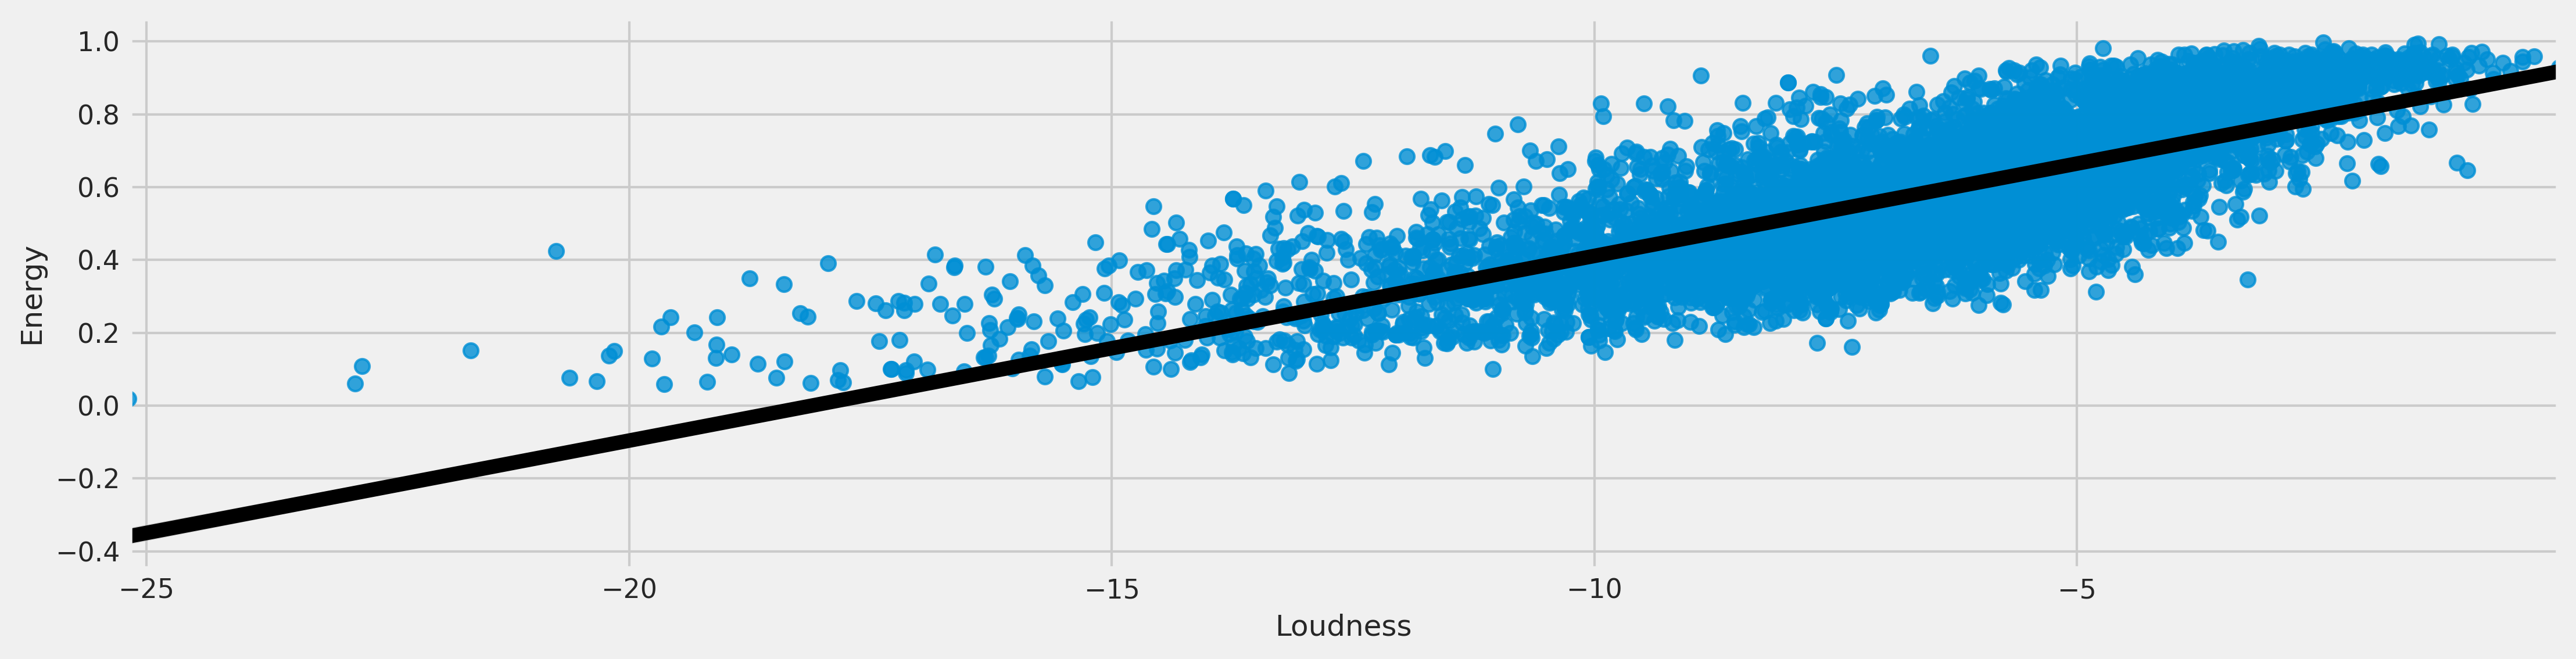

In [22]:
# scatterplot for loudness and energy
# sns.relplot(x='loudness', y='energy', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='loudness', y='energy', data=df, line_kws = {'color': 'black'})
plt.xlabel('Loudness', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

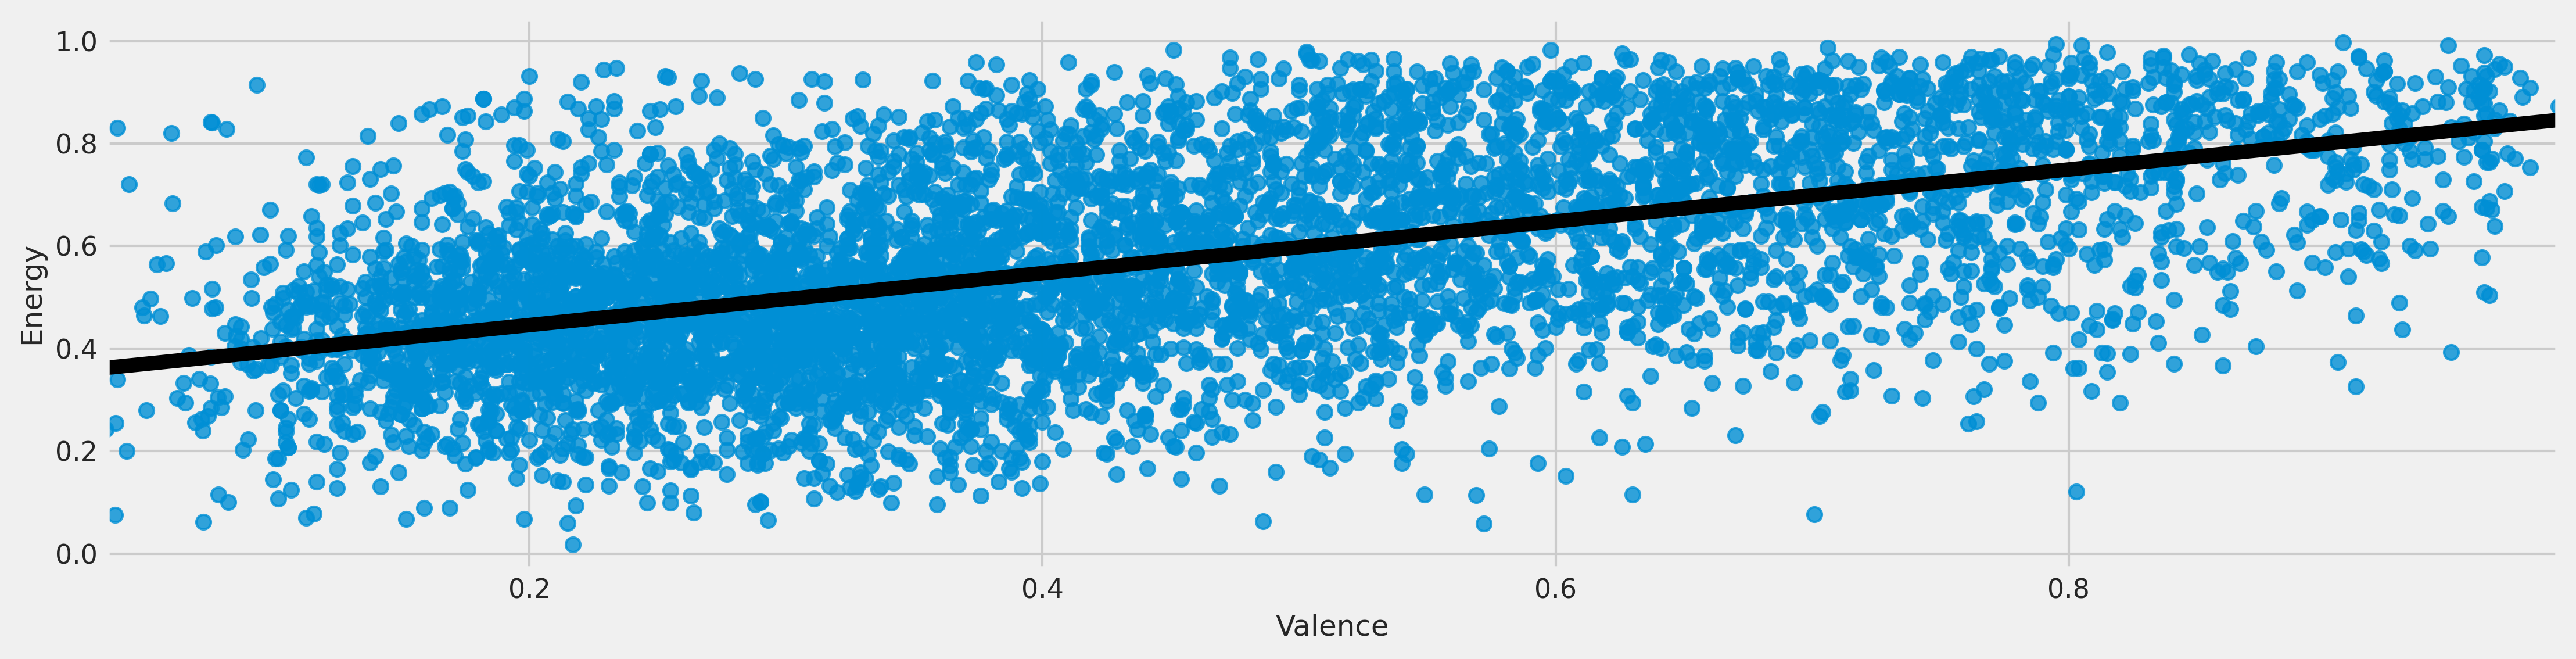

In [23]:
# scatterplot for valence and danceability
# sns.relplot(x='valence', y='danceability', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='valence', y='energy', data=df, line_kws = {'color': 'black'})
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

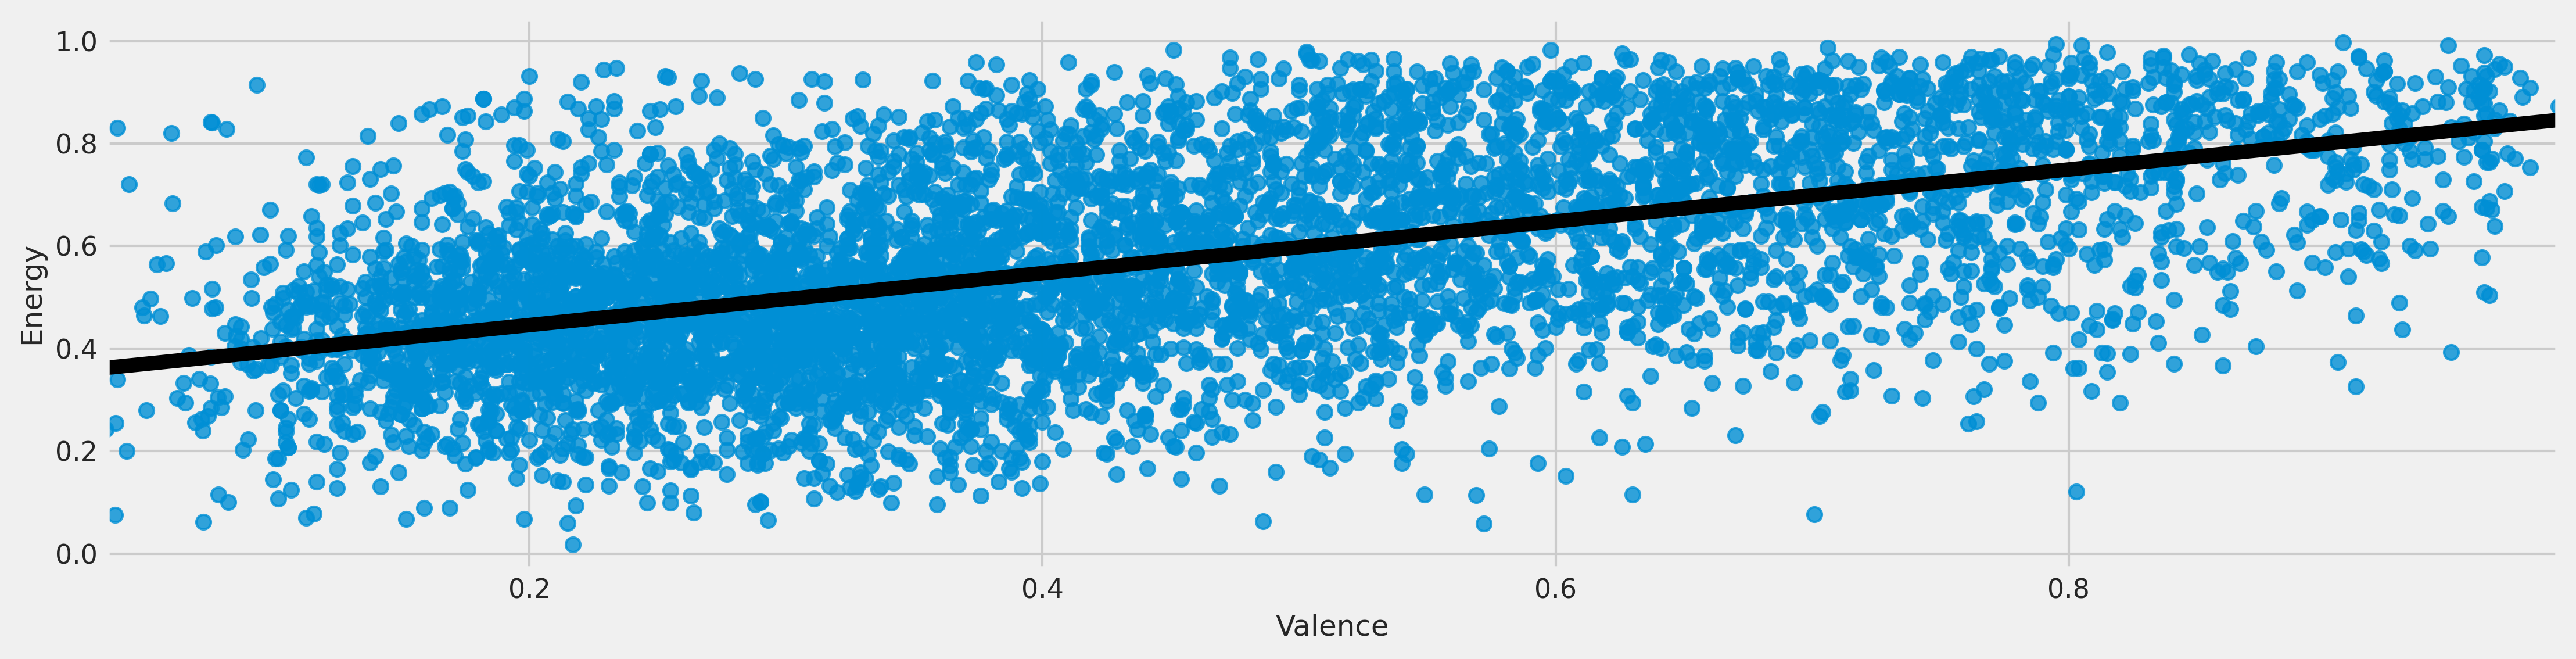

In [24]:
# scatterplot for valence and energy
# sns.relplot(x='valence', y='energy', data=df, kind='scatter', height=3.27, aspect=11.7/3.27)
sns.regplot(x='valence', y='energy', data=df, line_kws = {'color': 'black'})
plt.xlabel('Valence', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.tight_layout()

Yayy! Looks like we have a strong evidence that they all have positive linear relationships with each other.